<a href="https://colab.research.google.com/github/Jasmine-kaur8/Housing_Project/blob/main/Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import files
uploaded = files.upload()

Saving Housing_data_train.xlsx to Housing_data_train (2).xlsx


Importing the train data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the required libraries

In [119]:
df = pd.read_excel('Housing_data_train.xlsx')
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0  127         120       RL  ...        WD         Normal    128000
1  889          20       RL  ...        WD         Normal    268000
2  793          60       RL  ...        WD         Normal    269790
3  110          20       RL  ...       COD         Normal    190000
4  422          20       RL  ...        WD         Normal    215000

[5 rows x 81 columns]

In [120]:
df.shape

(1168, 81)

The data has 1168 rows and 81 columns

In [121]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

There are null values present in the data

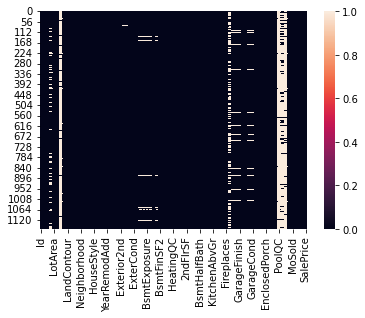

In [122]:
sns.heatmap(df.isnull())

missing values using Seaborn Heatmap

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Some of the features are object datatype and some are numerical type

In [124]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique())

Column-wise Unique values are as:-

 Unique values in  Id  column is  1168

 Unique values in  MSSubClass  column is  15

 Unique values in  MSZoning  column is  5

 Unique values in  LotFrontage  column is  106

 Unique values in  LotArea  column is  892

 Unique values in  Street  column is  2

 Unique values in  Alley  column is  2

 Unique values in  LotShape  column is  4

 Unique values in  LandContour  column is  4

 Unique values in  Utilities  column is  1

 Unique values in  LotConfig  column is  5

 Unique values in  LandSlope  column is  3

 Unique values in  Neighborhood  column is  25

 Unique values in  Condition1  column is  9

 Unique values in  Condition2  column is  8

 Unique values in  BldgType  column is  5

 Unique values in  HouseStyle  column is  8

 Unique values in  OverallQual  column is  10

 Unique values in  OverallCond  column is  9

 Unique values in  YearBuilt  column is  110

 Unique values in  YearRemodAdd  column is  61

 Unique values in  RoofStyle

In [125]:
#Let's check value count of object datatype columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

Pave    1164
Grvl       4
Name: Street, dtype: int64

Grvl    41
Pave    36
Name: Alley, dtype: int64

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

AllPub    1168
Name: Utilities, dtype: int64

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

Norm     

In [126]:
df.drop(columns = ['Utilities','Id'],axis=1,inplace=True)

Removing Column **Utilities** as we have only one unique value. Removing Column **Id** as it will not affect our analysis.

**STATISTICAL SUMMARY**

In [127]:
df.describe().transpose()

count           mean  ...       75%       max
MSSubClass     1168.0      56.767979  ...      70.0     190.0
LotFrontage     954.0      70.988470  ...      80.0     313.0
LotArea        1168.0   10484.749144  ...   11515.5  164660.0
OverallQual    1168.0       6.104452  ...       7.0      10.0
OverallCond    1168.0       5.595890  ...       6.0       9.0
YearBuilt      1168.0    1970.930651  ...    2000.0    2010.0
YearRemodAdd   1168.0    1984.758562  ...    2004.0    2010.0
MasVnrArea     1161.0     102.310078  ...     160.0    1600.0
BsmtFinSF1     1168.0     444.726027  ...     714.5    5644.0
BsmtFinSF2     1168.0      46.647260  ...       0.0    1474.0
BsmtUnfSF      1168.0     569.721747  ...     816.0    2336.0
TotalBsmtSF    1168.0    1061.095034  ...    1291.5    6110.0
1stFlrSF       1168.0    1169.860445  ...    1392.0    4692.0
2ndFlrSF       1168.0     348.826199  ...     729.0    2065.0
LowQualFinSF   1168.0       6.380137  ...       0.0     572.0
GrLivArea      1168.0    1525.066781  ...    1795.0    5642.0
BsmtFullBath   1168.0       0.425514  ...       1.0       3.0
BsmtHalfBath   1168.0       0.055651  ...       0.0       2.0
FullBath       1168.0       1.562500  ...       2.0       3.0
HalfBath       1168.0       0.388699  ...       1.0       2.0
BedroomAbvGr   1168.0       2.884418  ...       3.0       8.0
KitchenAbvGr   1168.0       1.045377  ...       1.0       3.0
TotRmsAbvGrd   1168.0       6.542808  ...       7.0      14.0
Fireplaces     1168.0       0.617295  ...       1.0       3.0
GarageYrBlt    1104.0    1978.193841  ...    2002.0    2010.0
GarageCars     1168.0       1.776541  ...       2.0       4.0
GarageArea     1168.0     476.860445  ...     576.0    1418.0
WoodDeckSF     1168.0      96.206336  ...     171.0     857.0
OpenPorchSF    1168.0      46.559932  ...      70.0     547.0
EnclosedPorch  1168.0      23.015411  ...       0.0     552.0
3SsnPorch      1168.0       3.639555  ...       0.0     508.0
ScreenPorch    1168.0      15.051370  ...       0.0     480.0
PoolArea       1168.0       3.448630  ...       0.0     738.0
MiscVal        1168.0      47.315068  ...       0.0   15500.0
MoSold         1168.0       6.344178  ...       8.0      12.0
YrSold         1168.0    2007.804795  ...    2009.0    2010.0
SalePrice      1168.0  181477.005993  ...  215000.0  755000.0

[37 rows x 8 columns]

Following columns have dispersed data:
1.   LotArea
2.   MasVnrArea
3.   BsmtUnfSF
4.   TotalBsmtSF
5.   1stFlrSF
6.   2ndFlrSF
7.   GoLivArea
8.   GarageArea

Some features have high standard deviation:
1.   BsmtFinSF1
2.   BsmtFinSF2
3.   LowQualFinSF
4.   BsmtFullBath
5.   BsmtHalfBath
6.   WoodDeckSF
7.   OpenPorchSF
8.   EnclosedPorsh
9.   3SsnPorsh
10.  ScreenPorsh
11.  PoolArea
12.  MiscVal
13.  SalesPrice


**MISSING VALUES**

In [128]:
def missing_values(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * df.isnull().sum() / len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    miss_val_table_ren_columns = miss_val_table_ren_columns[
        miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(miss_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return miss_val_table_ren_columns
missing_values(df)

Selected dataframe has 79 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

Checking missing values percentage column wise:
**Majority of data is missing in:**

*   PoolQC
*   MiscFeature
*   Alley
*   Fence
*   FireplaceQu


In [129]:
df["Alley"].fillna("NA",inplace=True)
df["Fence"].fillna("NA",inplace=True)
df["PoolQC"].fillna("NA",inplace=True)
df["MiscFeature"].fillna("NA",inplace=True)
df["FireplaceQu"].fillna("NA",inplace=True)
df["GarageType"].fillna("NA",inplace=True)
df["GarageFinish"].fillna("NA",inplace=True)
df["GarageQual"].fillna("NA",inplace=True)
df["GarageCond"].fillna("NA",inplace=True)
df["BsmtQual"].fillna("NA",inplace=True)
df["BsmtCond"].fillna("NA",inplace=True)
df["BsmtExposure"].fillna("NA",inplace=True)
df["BsmtFinType1"].fillna("NA",inplace=True)
df["BsmtFinType2"].fillna("NA",inplace=True)
df["MasVnrType"].fillna("NA",inplace=True)

Dealt with the categorical data by substituting NA in place of null value.

In [130]:
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(),inplace=True)
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)

In [131]:
df=df.dropna()

as GarageYrBlt have year info of manufature so we will drop Nan values in the column.

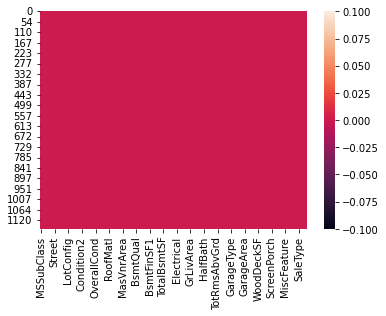

In [132]:
sns.heatmap(df.isnull())

There is no null value in the data

**EXPLORATORY DATA ANALYSIS**

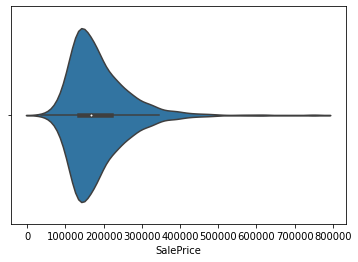

In [133]:
sns.violinplot(df['SalePrice'])
plt.show()

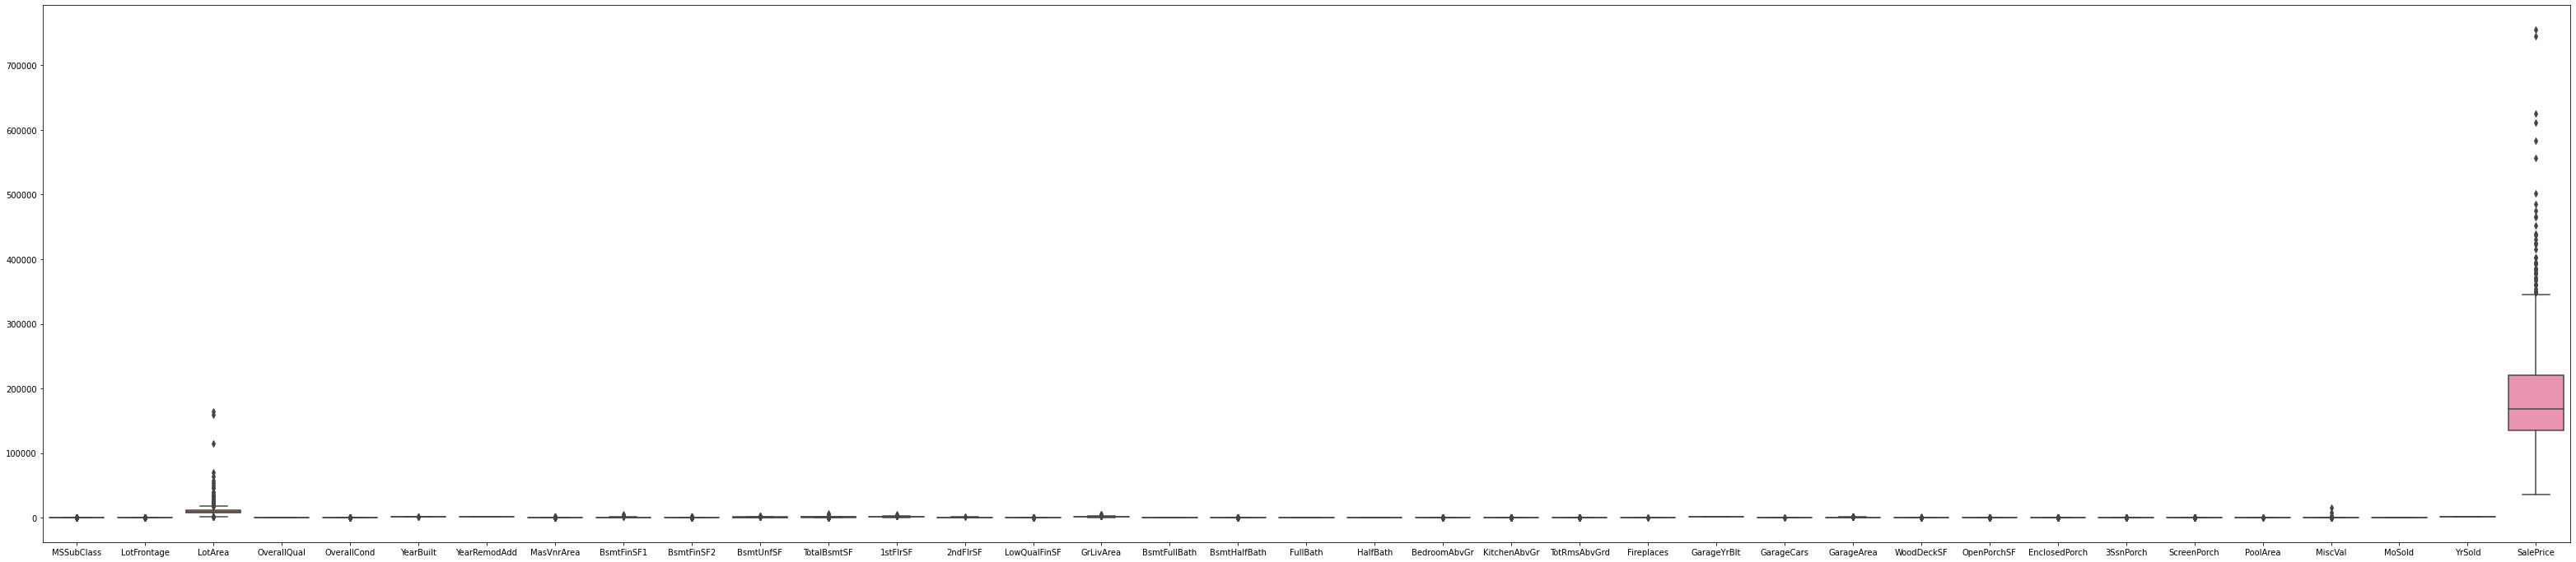

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = df, ax=ax)
plt.show()

There are many outliers in the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4307ac1090>,
      dtype=object)

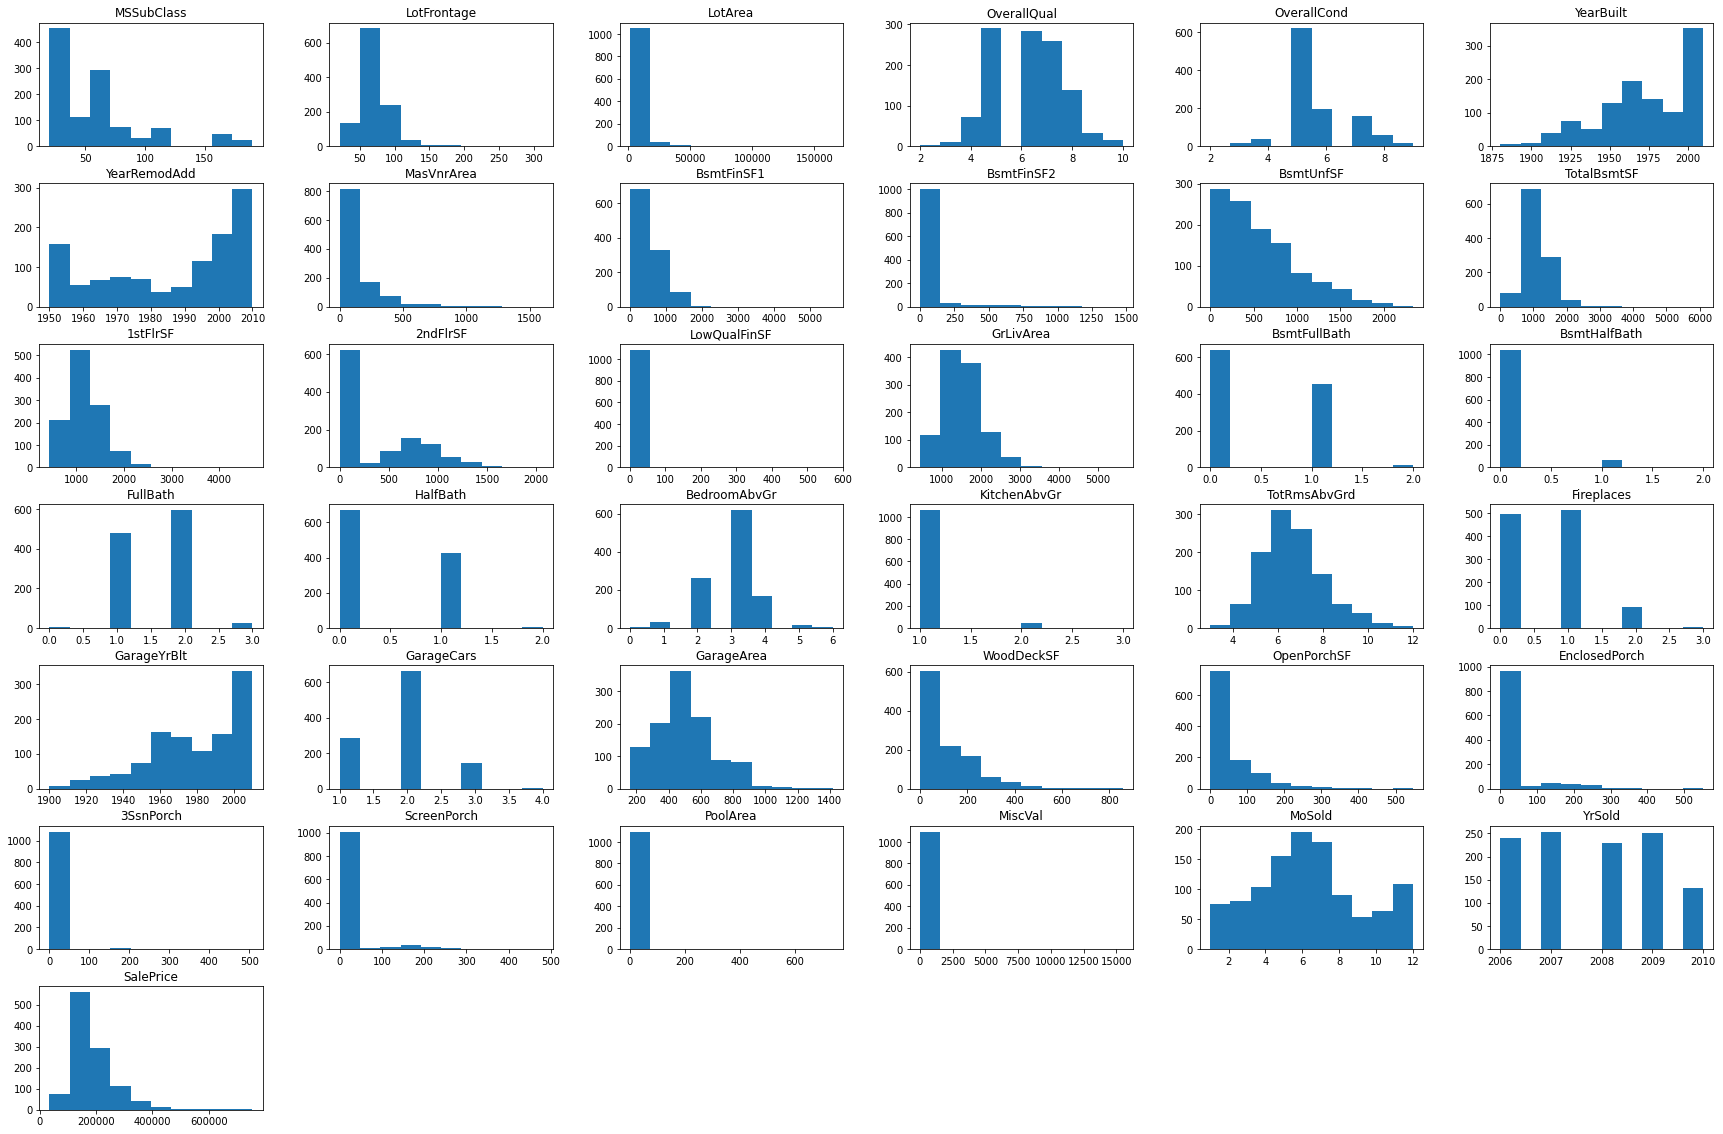

In [135]:
df.hist(figsize = (30,20), grid = False)

The data is skewed

In [136]:
corr=df.corr()
corr

MSSubClass  LotFrontage   LotArea  ...    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.333421 -0.118975  ... -0.011989 -0.035892  -0.054563
LotFrontage     -0.333421     1.000000  0.294180  ...  0.020680 -0.001697   0.317947
LotArea         -0.118975     0.294180  1.000000  ...  0.007759 -0.036508   0.236813
OverallQual      0.087739     0.218641  0.088133  ...  0.077931 -0.041843   0.783764
OverallCond     -0.109628    -0.039313  0.018139  ... -0.003172  0.061307  -0.091507
YearBuilt        0.056375     0.099601 -0.015682  ...  0.016035 -0.007575   0.499255
YearRemodAdd     0.047479     0.086181  0.014765  ...  0.014638  0.034723   0.502735
MasVnrArea       0.039458     0.186460  0.113428  ...  0.005767 -0.010154   0.453943
BsmtFinSF1      -0.053719     0.235303  0.218360  ...  0.000720  0.006550   0.352882
BsmtFinSF2      -0.071236     0.001118  0.054372  ... -0.018783  0.035864  -0.023454
BsmtUnfSF       -0.132162     0.101474 -0.000818  ...  0.026620 -0.053098   0.212177
TotalBsmtSF     -0.219834     0.354332  0.251610  ...  0.020941 -0.033905   0.583416
1stFlrSF        -0.231241     0.399540  0.305063  ...  0.037574 -0.037118   0.576029
2ndFlrSF         0.300212     0.087361  0.054767  ...  0.037881 -0.038880   0.322632
LowQualFinSF     0.020155    -0.004066  0.008919  ... -0.039112 -0.032238  -0.011823
GrLivArea        0.082911     0.372965  0.275648  ...  0.057018 -0.063417   0.703919
BsmtFullBath    -0.018229     0.105987  0.144727  ... -0.007042  0.056726   0.209439
BsmtHalfBath     0.008084     0.007749  0.057857  ...  0.028762 -0.045024  -0.020753
FullBath         0.137291     0.168430  0.113644  ...  0.058277 -0.040538   0.546409
HalfBath         0.188506     0.038230 -0.001686  ... -0.009079 -0.022341   0.283344
BedroomAbvGr    -0.058952     0.247634  0.117311  ...  0.060239 -0.028647   0.151994
KitchenAbvGr     0.259771    -0.008721 -0.011102  ...  0.030154 -0.025868  -0.138653
TotRmsAbvGrd     0.032621     0.323517  0.180404  ...  0.053007 -0.067334   0.529231
Fireplaces      -0.014950     0.225752  0.279979  ...  0.063802 -0.024312   0.442249
GarageYrBlt      0.077630     0.057666 -0.034981  ...  0.003410 -0.011431   0.474346
GarageCars       0.030730     0.252201  0.137527  ...  0.061280 -0.067692   0.619441
GarageArea      -0.055934     0.325514  0.180960  ...  0.032979 -0.040563   0.600582
WoodDeckSF      -0.022539     0.086664  0.213686  ...  0.007511  0.024484   0.306442
OpenPorchSF      0.019103     0.160412  0.093693  ...  0.054115 -0.078699   0.362718
EnclosedPorch   -0.014625     0.023554 -0.000971  ... -0.032350 -0.001577  -0.105789
3SsnPorch       -0.043027     0.049404  0.023514  ...  0.019333  0.015099   0.054754
ScreenPorch     -0.007875     0.024313  0.020104  ...  0.030392  0.018350   0.087596
PoolArea         0.011932     0.199912  0.096224  ... -0.040957 -0.067924   0.102357
MiscVal         -0.021933    -0.003238  0.050845  ... -0.008596 -0.010828  -0.017303
MoSold          -0.011989     0.020680  0.007759  ...  1.000000 -0.141347   0.060630
YrSold          -0.035892    -0.001697 -0.036508  ... -0.141347  1.000000  -0.046127
SalePrice       -0.054563     0.317947  0.236813  ...  0.060630 -0.046127   1.000000

[37 rows x 37 columns]

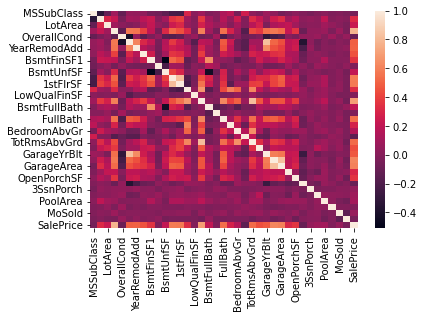

In [137]:
sns.heatmap(corr)

1- SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars & GarageArea.

2- SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch & YrSold columns.

3- Multicollinearity is present between various columns so using Principal Component Analysis(PCA) will be a great choice.

Text(0.5, 1.0, 'correaltion between input & target feature')

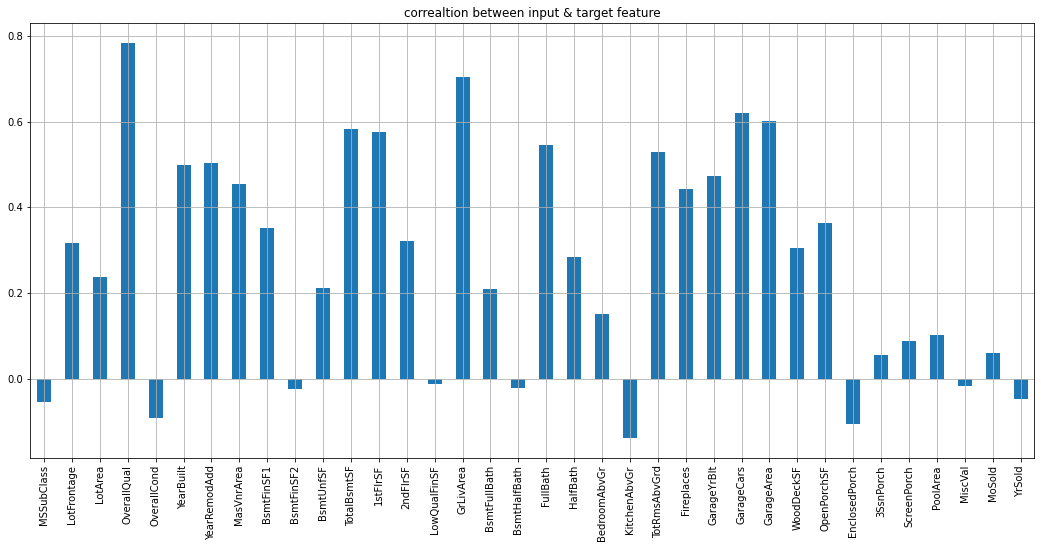

In [138]:
plt.figure(figsize=(18,8))
df.drop('SalePrice', axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion between input & target feature")

Some features are highly correlated with the target variable while others are very less related to the target variable

In [139]:
cat_col = [x for x in df.columns if df[x].dtype==object]
cont_col = [x for x in df.columns if x not in cat_col]
cat = pd.Series(cat_col)
cont = pd.Series(cont_col)

making different lists for categorical & continuous variables

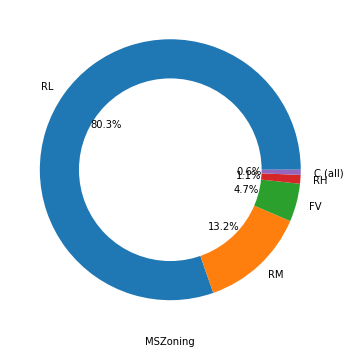

<Figure size 432x288 with 0 Axes>

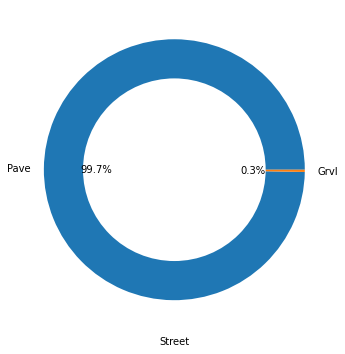

<Figure size 432x288 with 0 Axes>

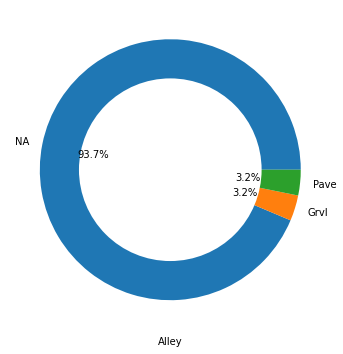

<Figure size 432x288 with 0 Axes>

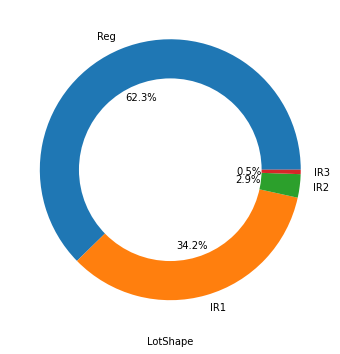

<Figure size 432x288 with 0 Axes>

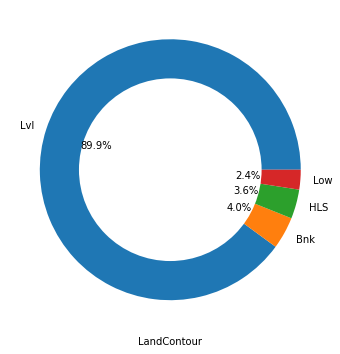

<Figure size 432x288 with 0 Axes>

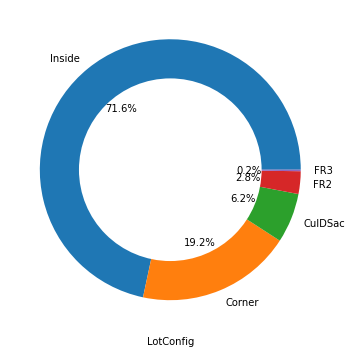

<Figure size 432x288 with 0 Axes>

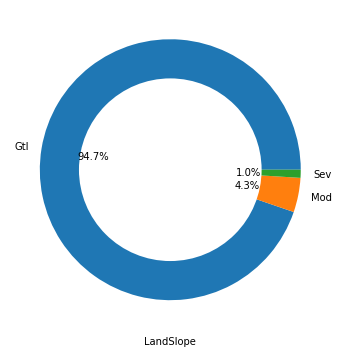

<Figure size 432x288 with 0 Axes>

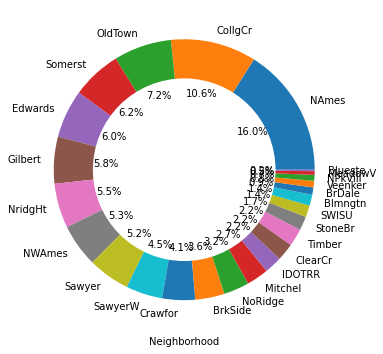

<Figure size 432x288 with 0 Axes>

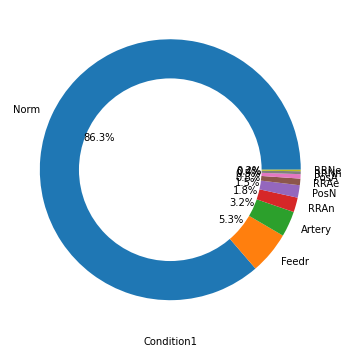

<Figure size 432x288 with 0 Axes>

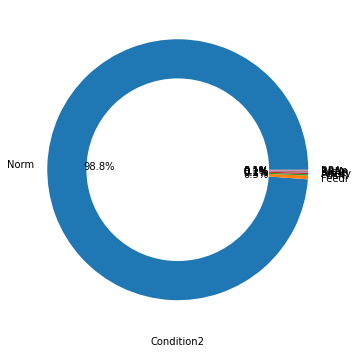

<Figure size 432x288 with 0 Axes>

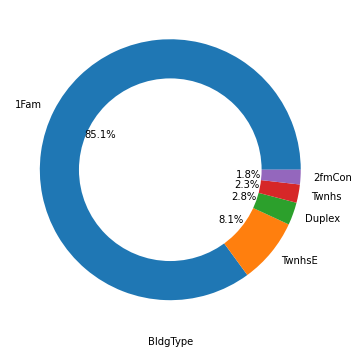

<Figure size 432x288 with 0 Axes>

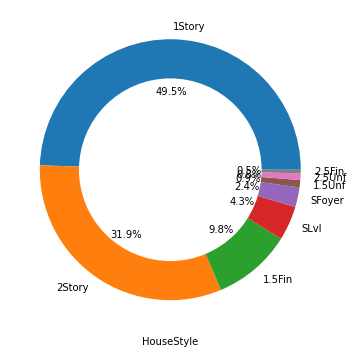

<Figure size 432x288 with 0 Axes>

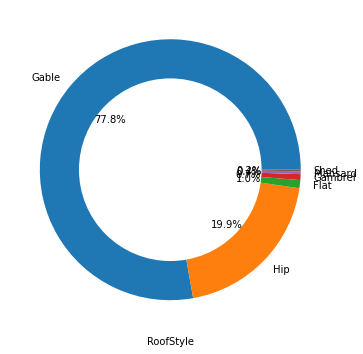

<Figure size 432x288 with 0 Axes>

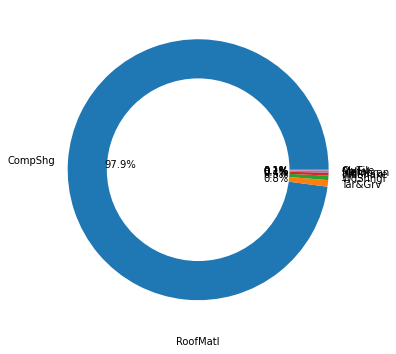

<Figure size 432x288 with 0 Axes>

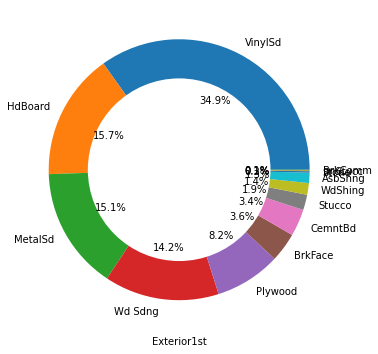

<Figure size 432x288 with 0 Axes>

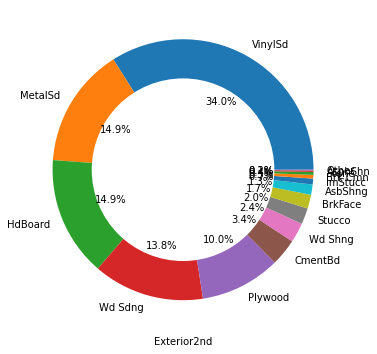

<Figure size 432x288 with 0 Axes>

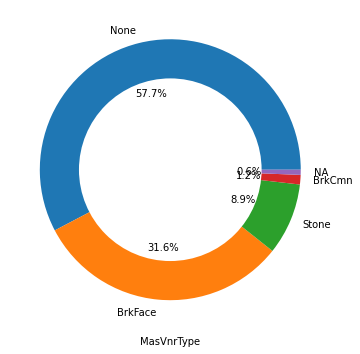

<Figure size 432x288 with 0 Axes>

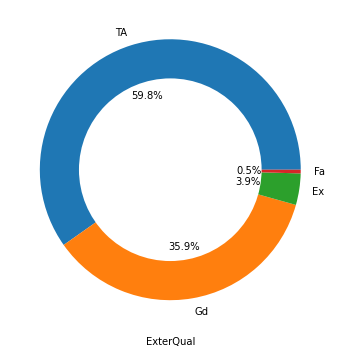

<Figure size 432x288 with 0 Axes>

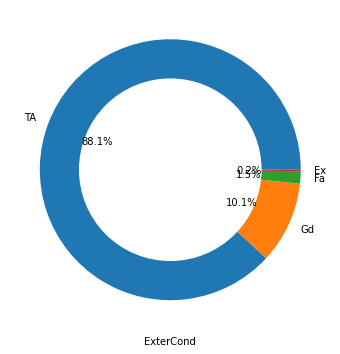

<Figure size 432x288 with 0 Axes>

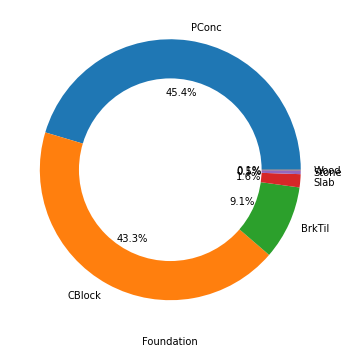

<Figure size 432x288 with 0 Axes>

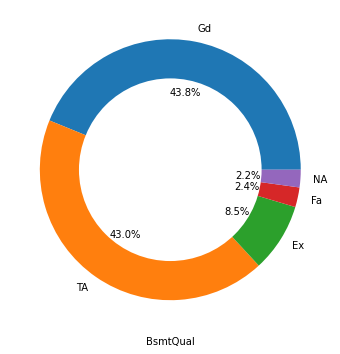

<Figure size 432x288 with 0 Axes>

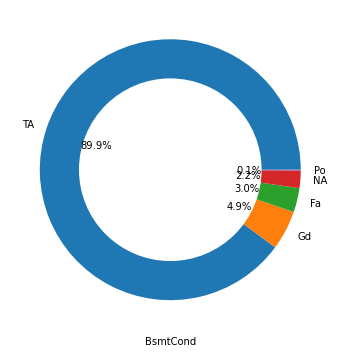

<Figure size 432x288 with 0 Axes>

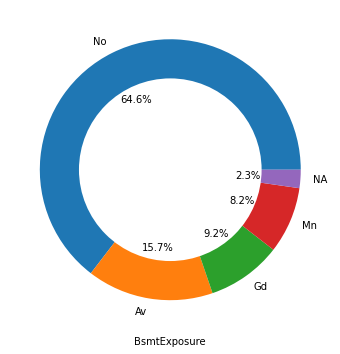

<Figure size 432x288 with 0 Axes>

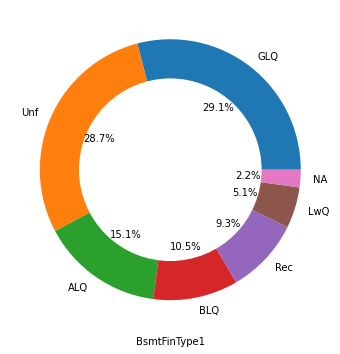

<Figure size 432x288 with 0 Axes>

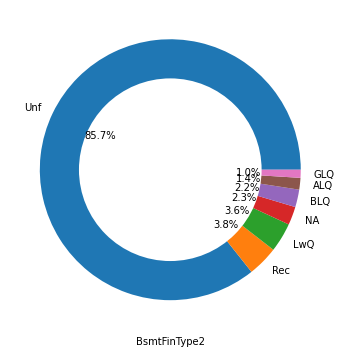

<Figure size 432x288 with 0 Axes>

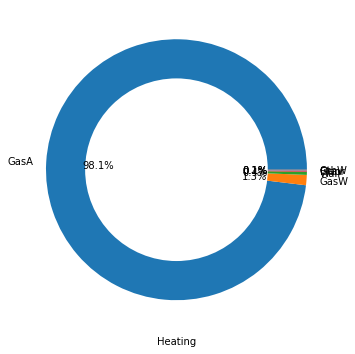

<Figure size 432x288 with 0 Axes>

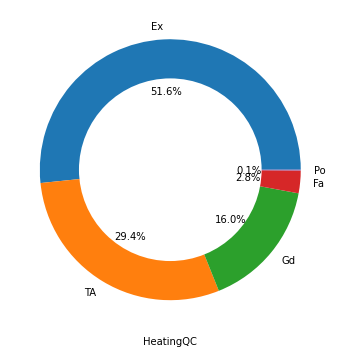

<Figure size 432x288 with 0 Axes>

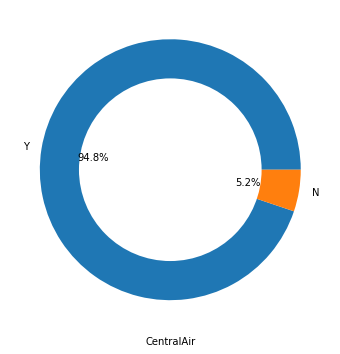

<Figure size 432x288 with 0 Axes>

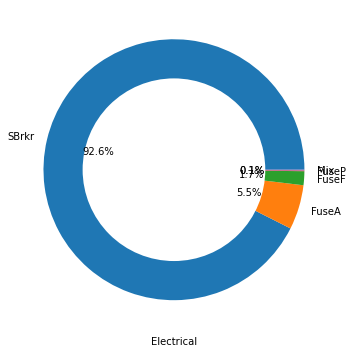

<Figure size 432x288 with 0 Axes>

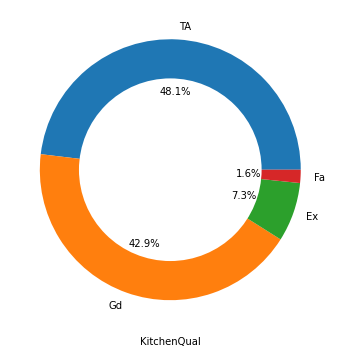

<Figure size 432x288 with 0 Axes>

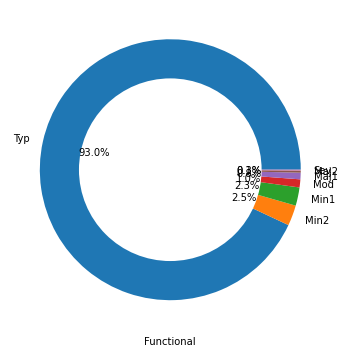

<Figure size 432x288 with 0 Axes>

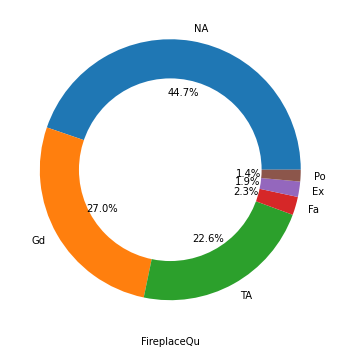

<Figure size 432x288 with 0 Axes>

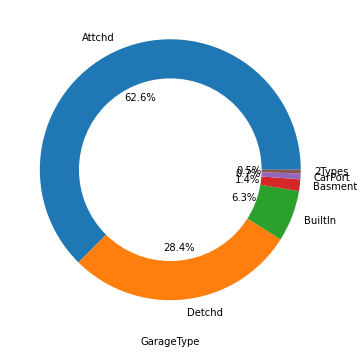

<Figure size 432x288 with 0 Axes>

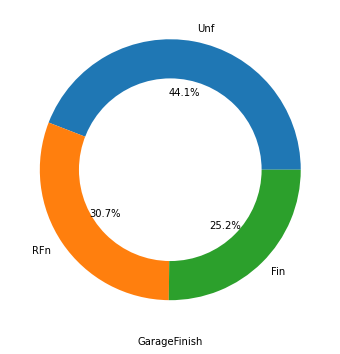

<Figure size 432x288 with 0 Axes>

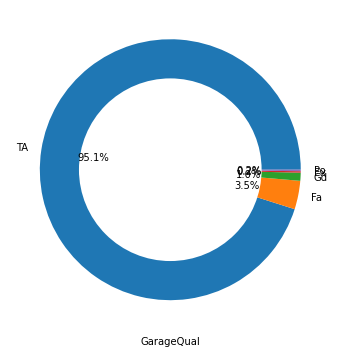

<Figure size 432x288 with 0 Axes>

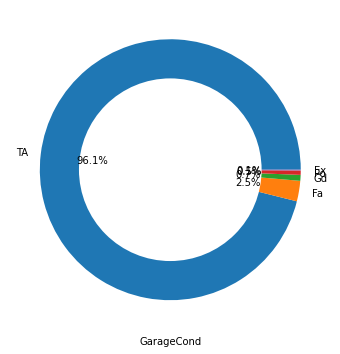

<Figure size 432x288 with 0 Axes>

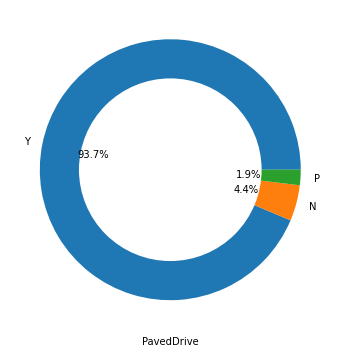

<Figure size 432x288 with 0 Axes>

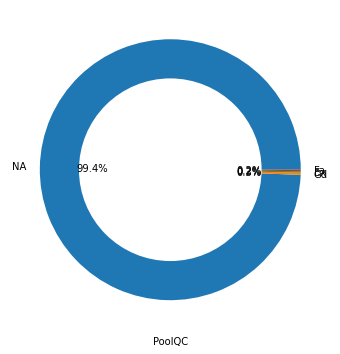

<Figure size 432x288 with 0 Axes>

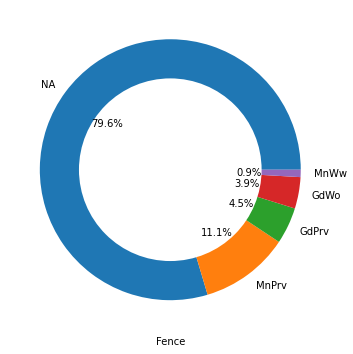

<Figure size 432x288 with 0 Axes>

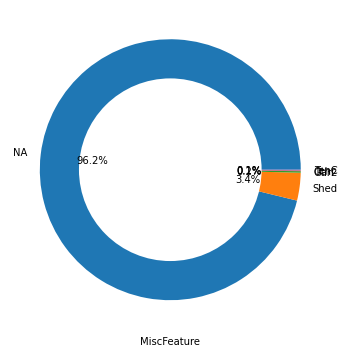

<Figure size 432x288 with 0 Axes>

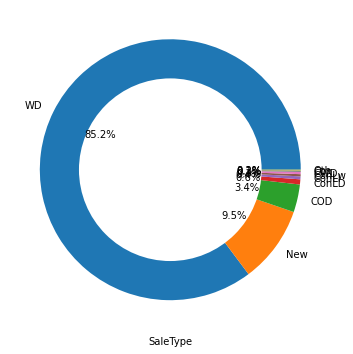

<Figure size 432x288 with 0 Axes>

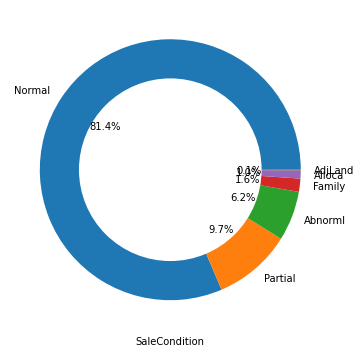

<Figure size 432x288 with 0 Axes>

In [140]:
for i in cat_column:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

The graphs show the distribution of components of categorical features

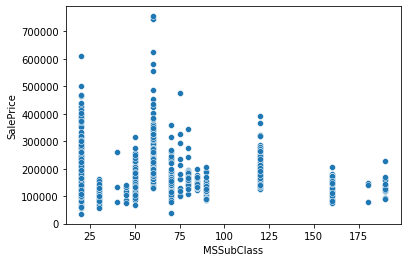

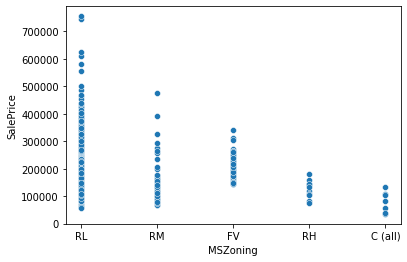

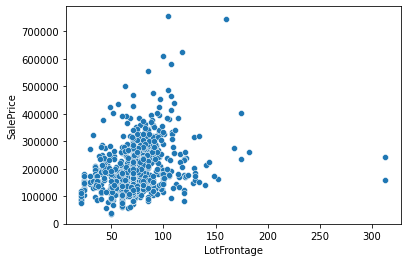

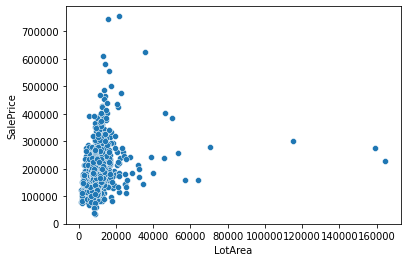

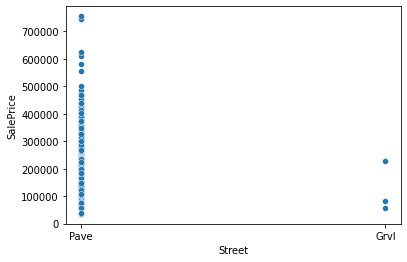

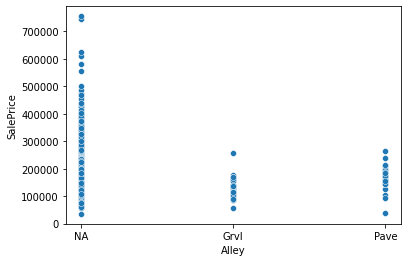

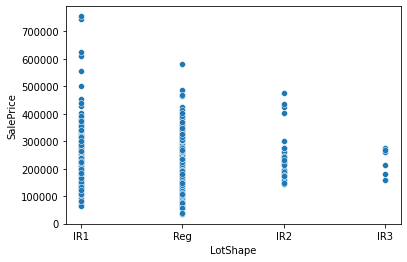

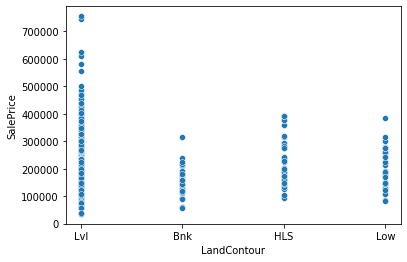

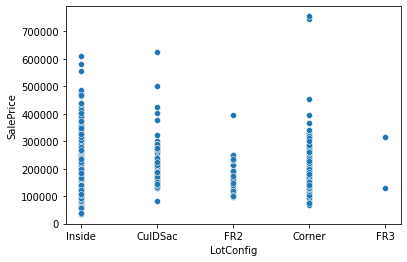

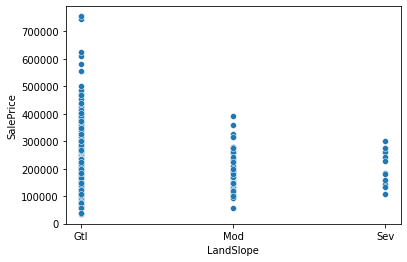

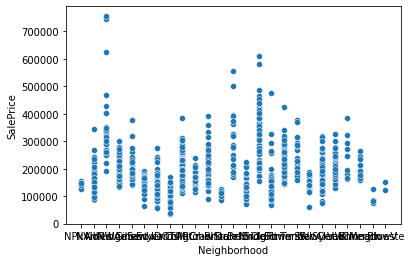

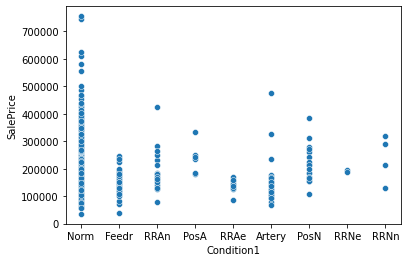

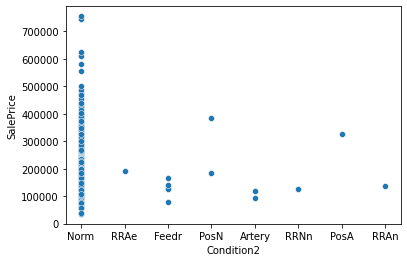

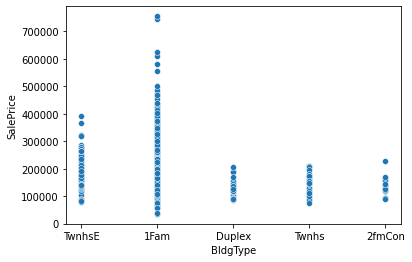

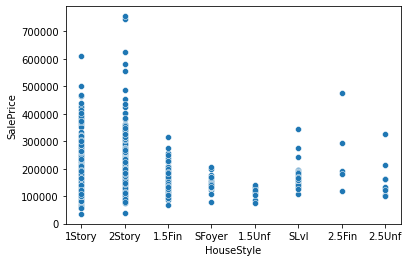

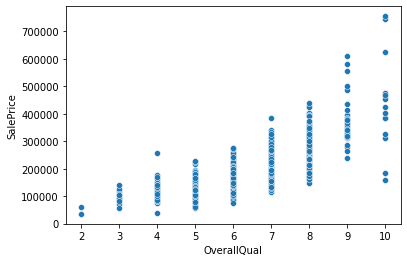

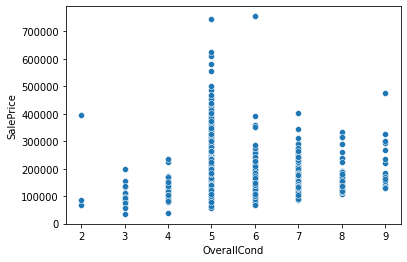

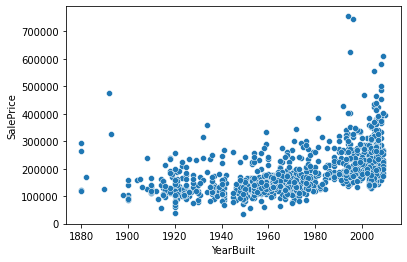

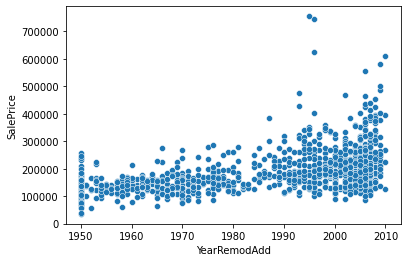

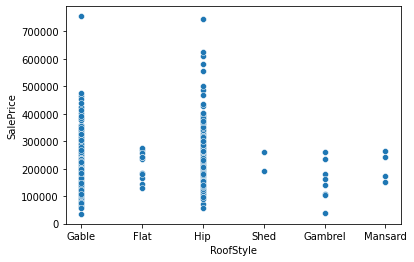

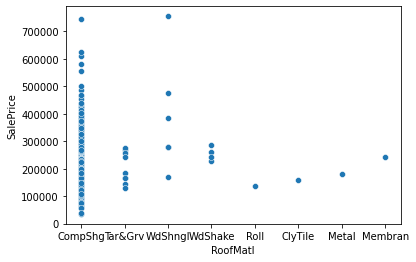

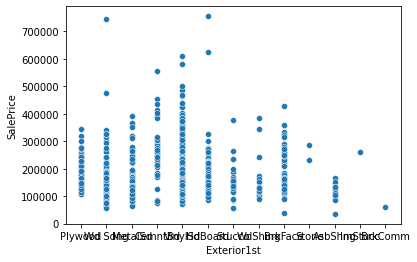

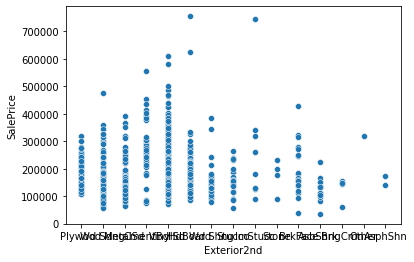

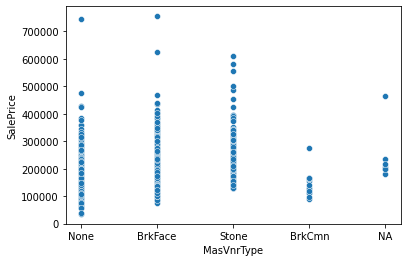

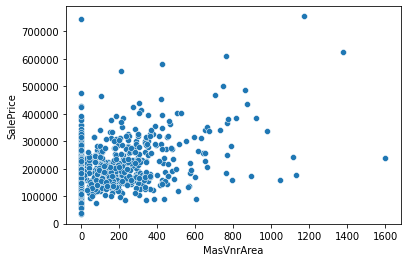

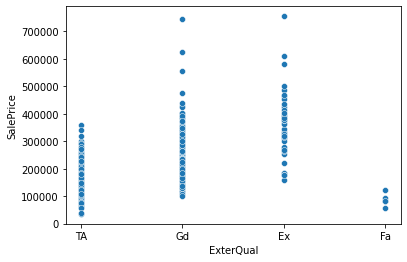

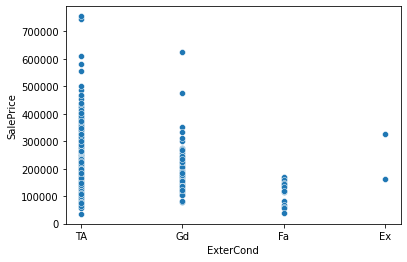

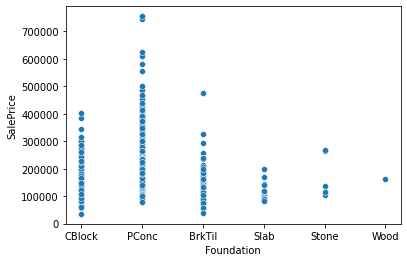

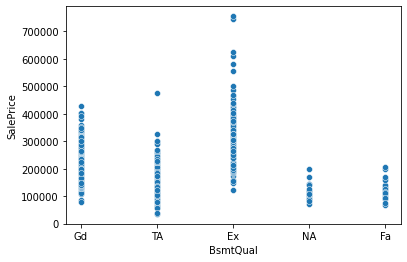

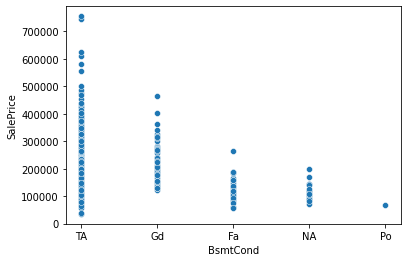

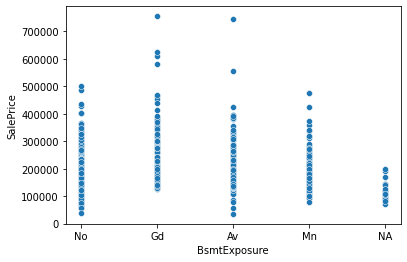

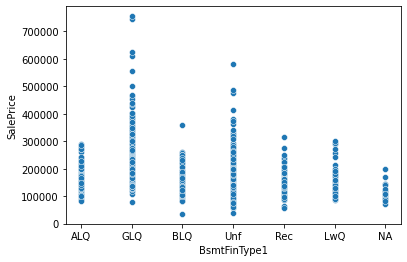

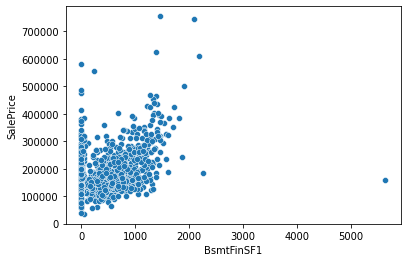

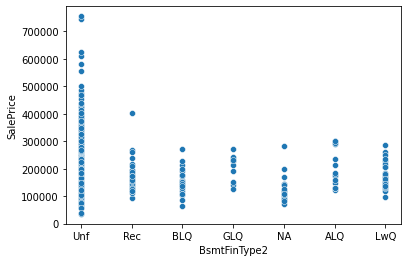

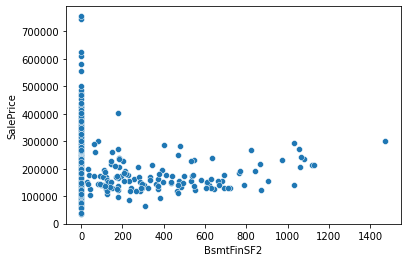

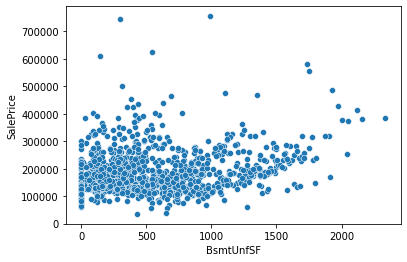

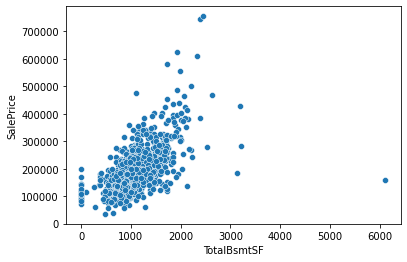

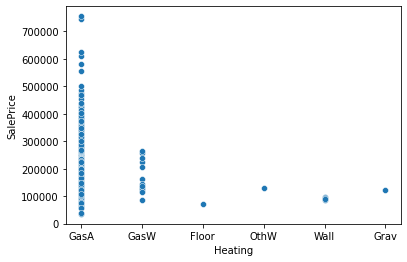

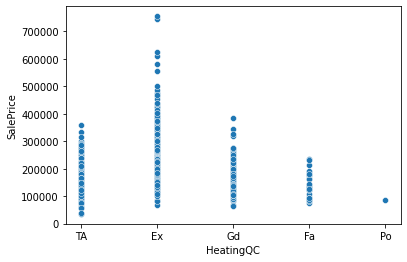

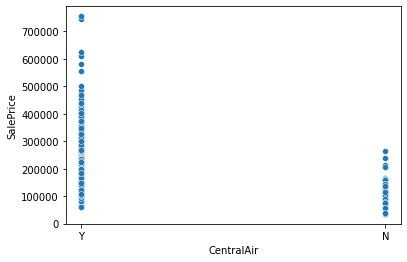

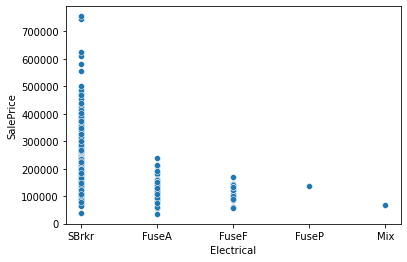

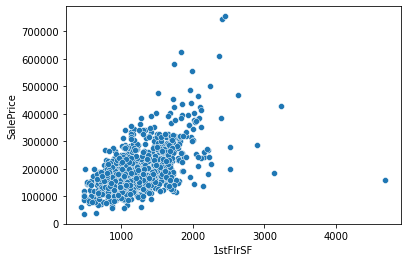

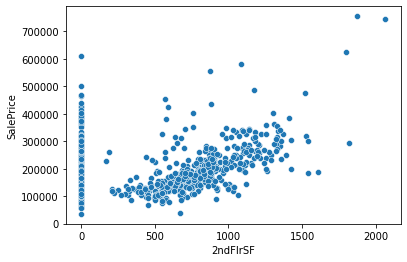

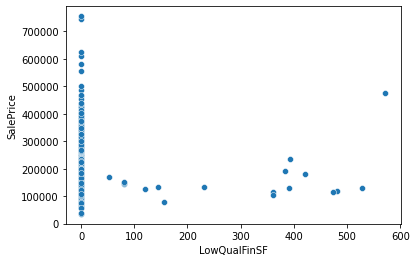

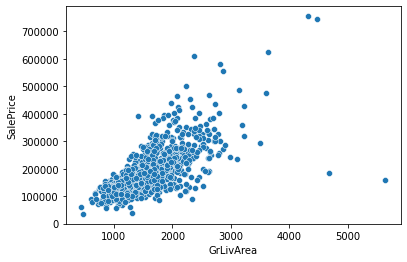

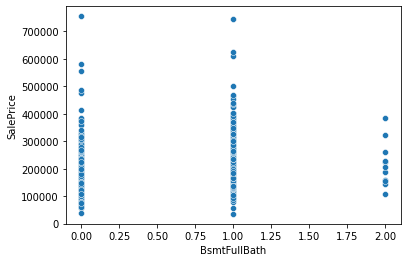

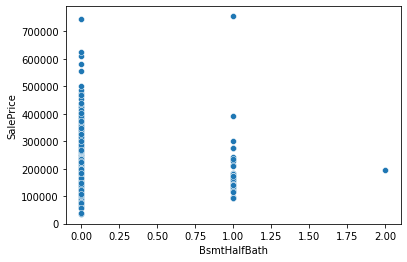

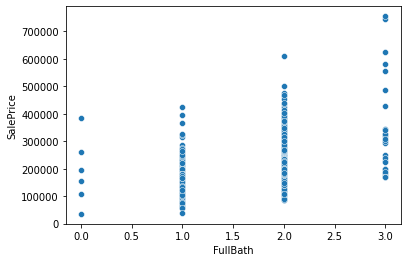

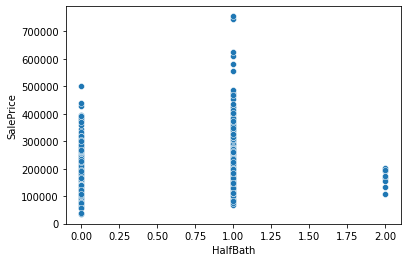

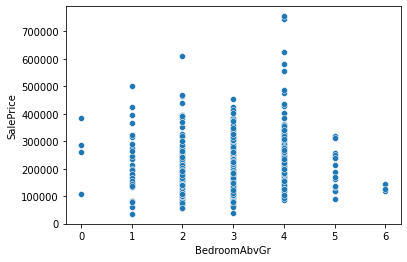

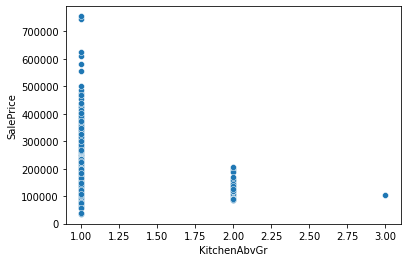

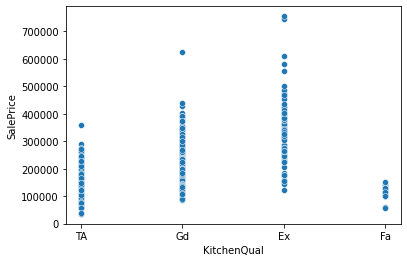

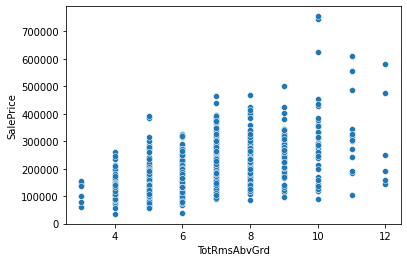

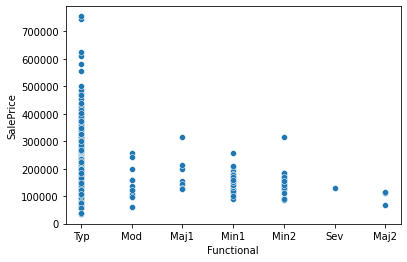

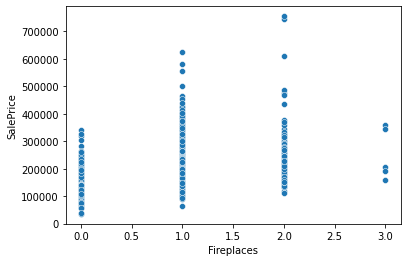

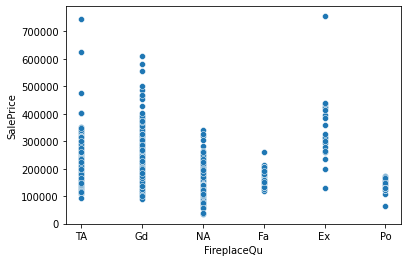

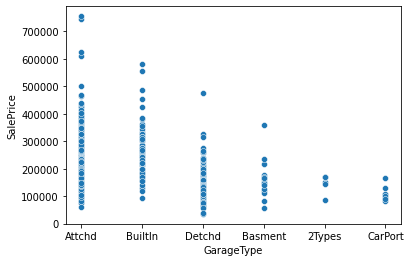

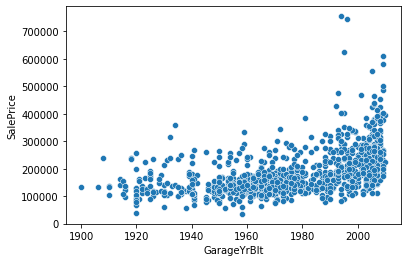

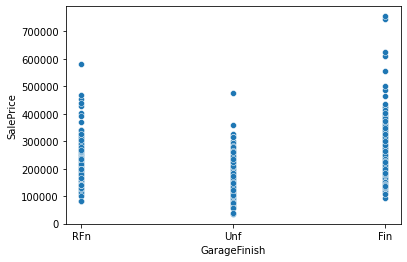

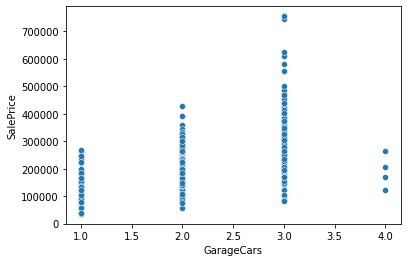

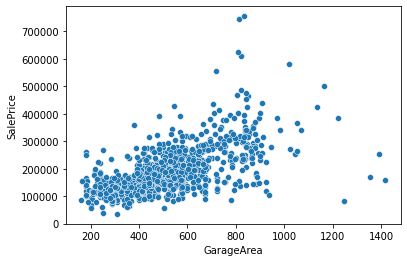

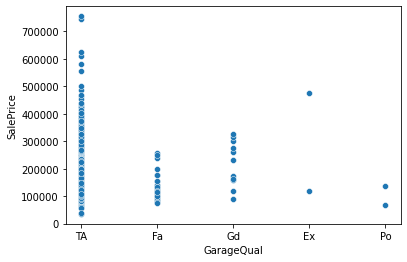

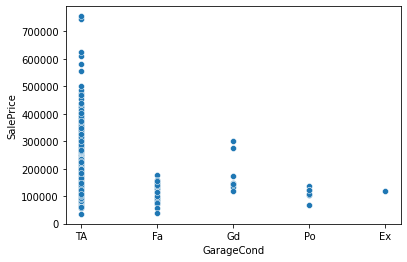

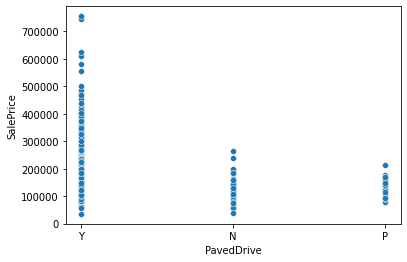

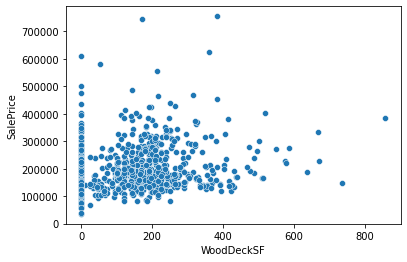

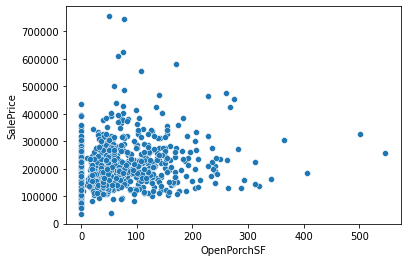

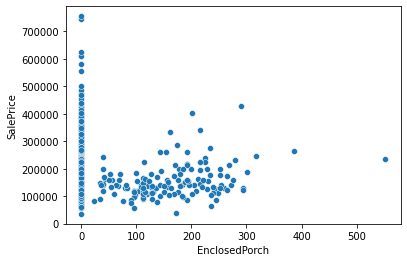

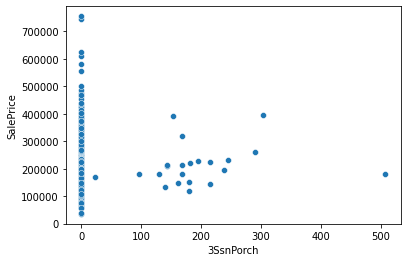

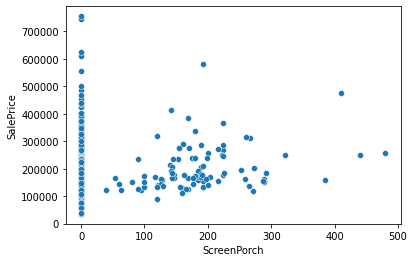

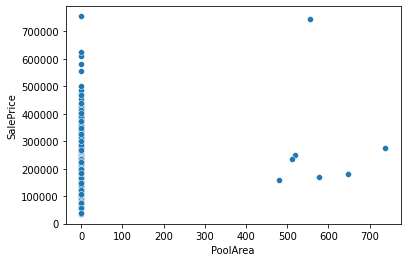

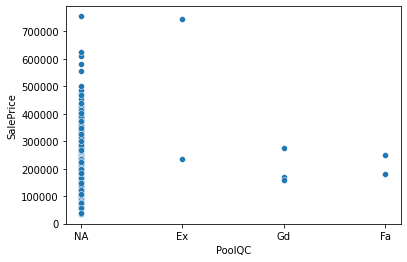

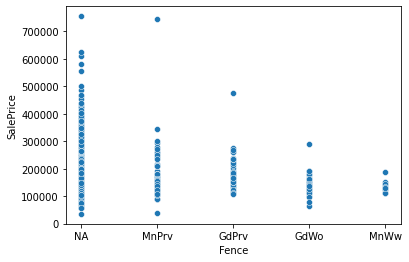

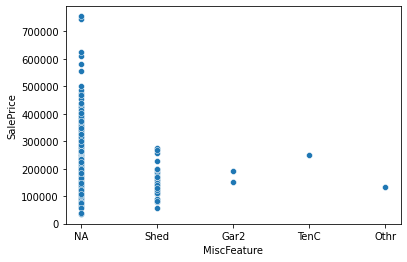

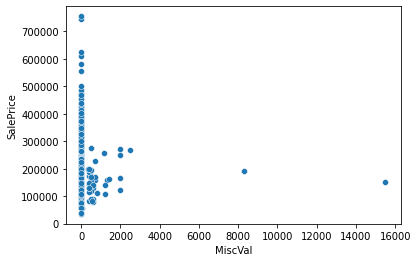

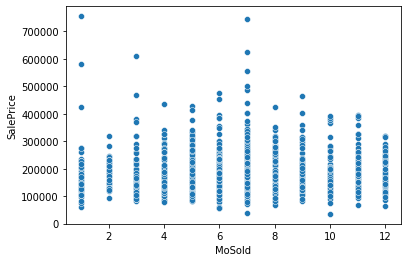

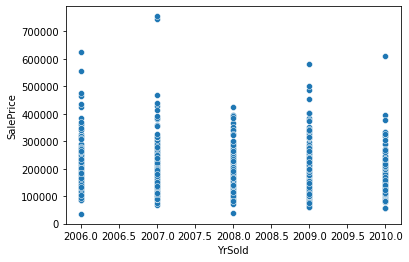

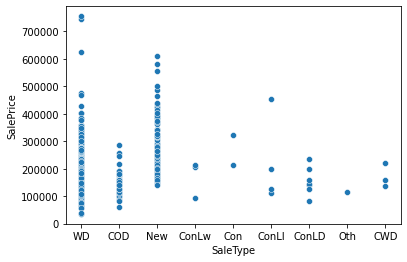

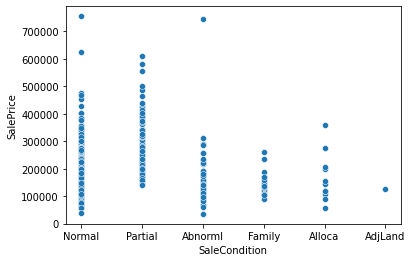

In [141]:
out_var=df['SalePrice']
input_var=df.drop(['SalePrice'],axis=1)
for i in input_var.columns:
    plt.subplots()
    sns.scatterplot(input_var[i],out_var)

Scatter Plots between output & Input variables

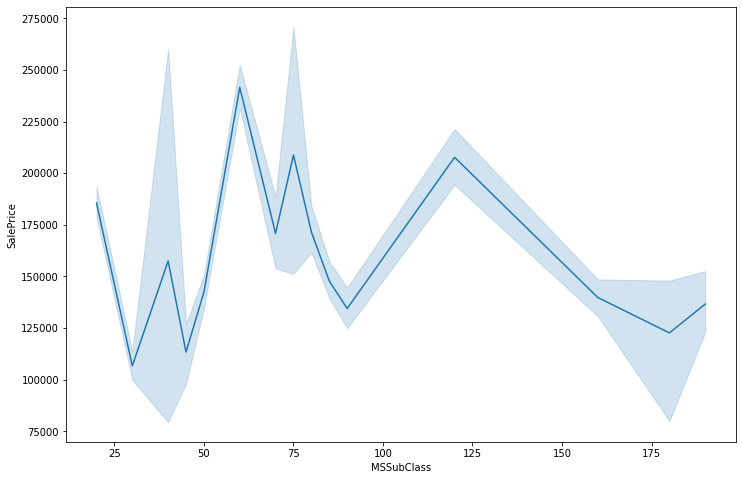

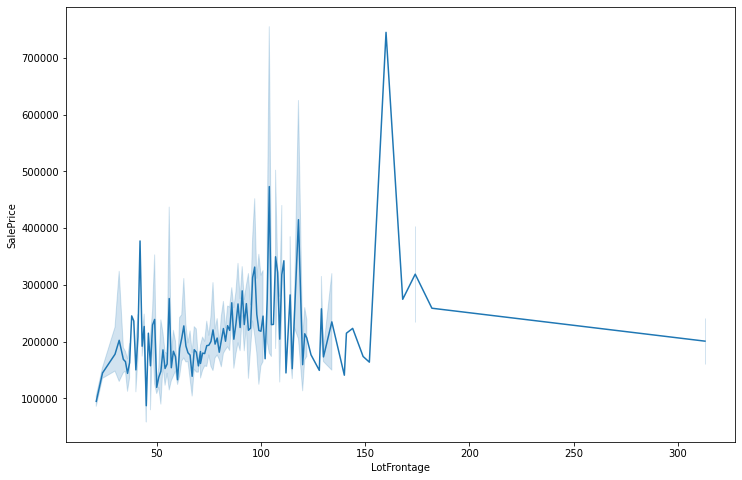

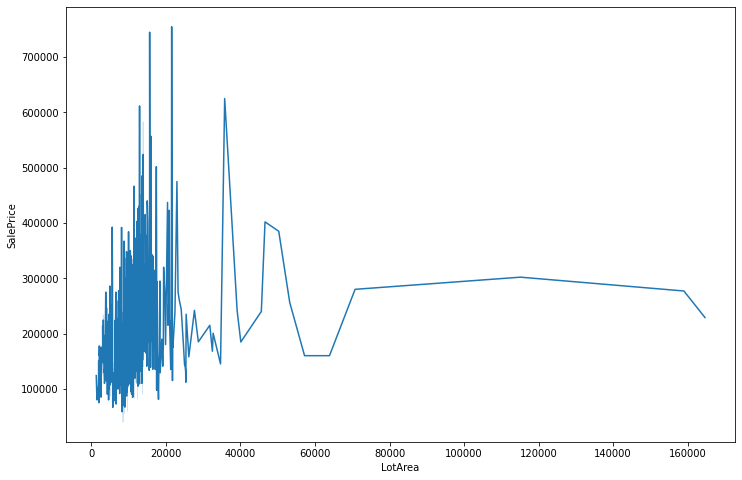

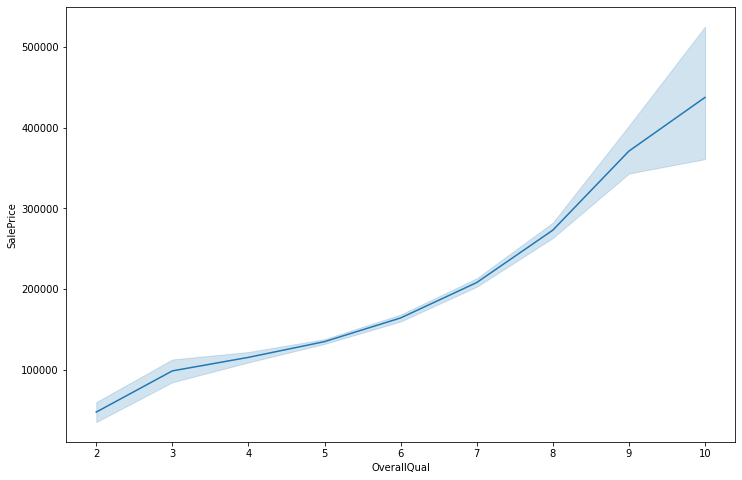

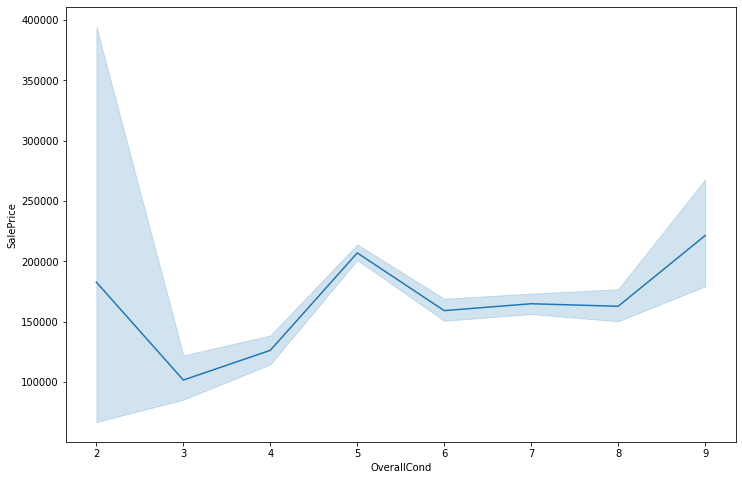

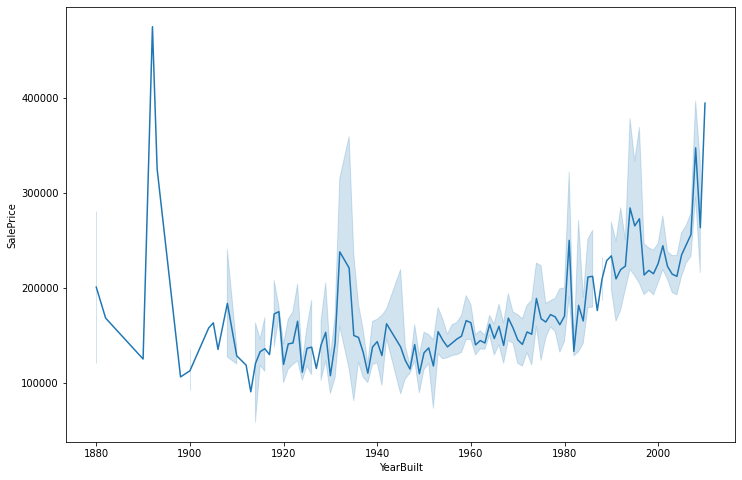

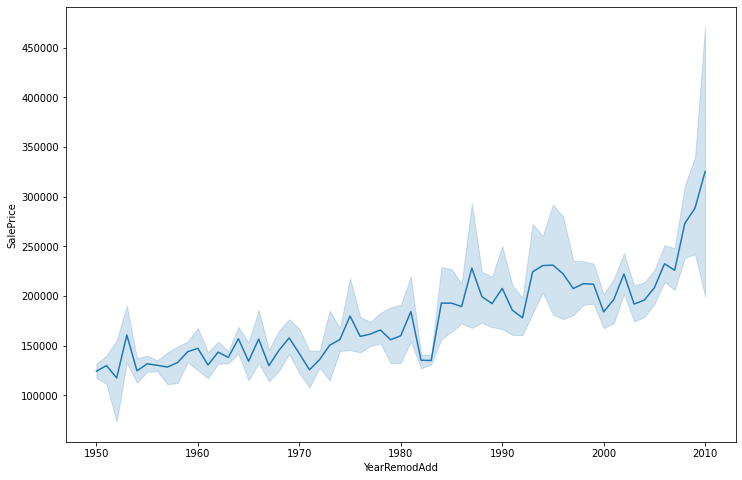

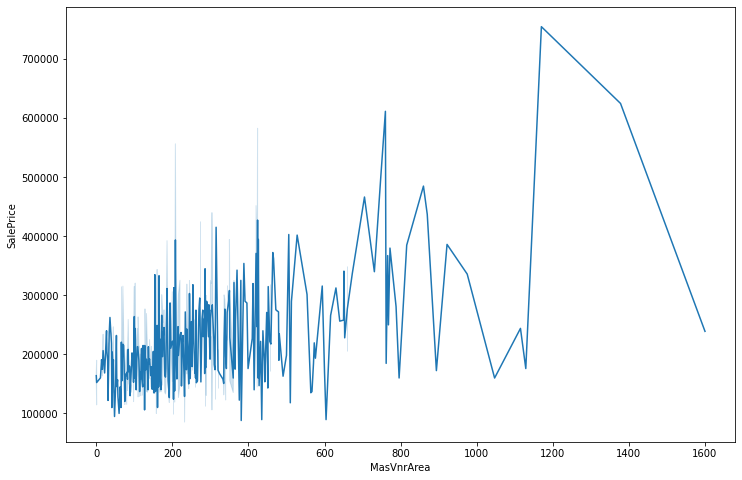

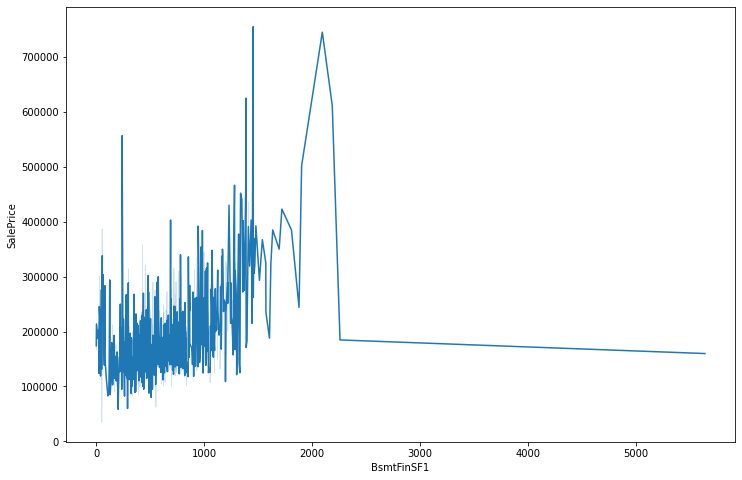

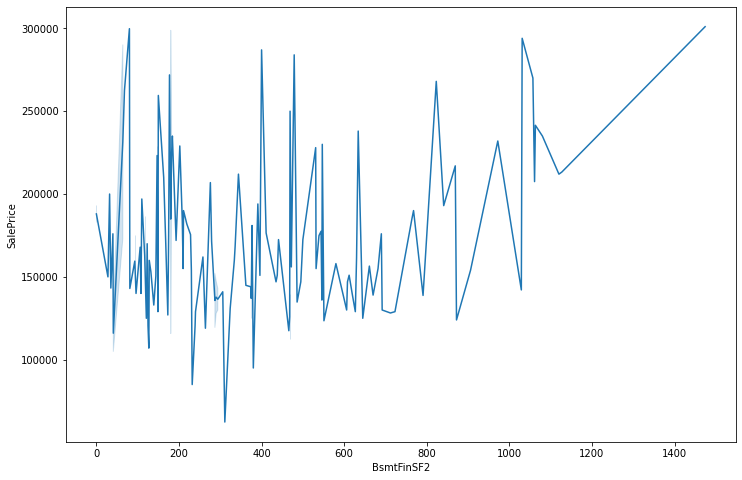

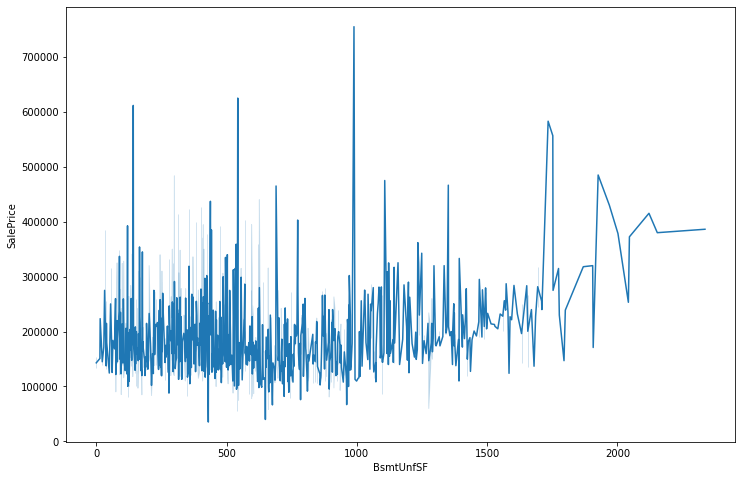

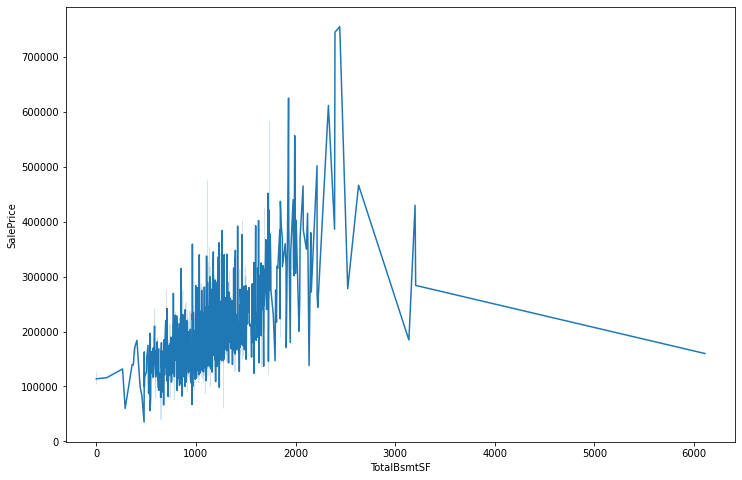

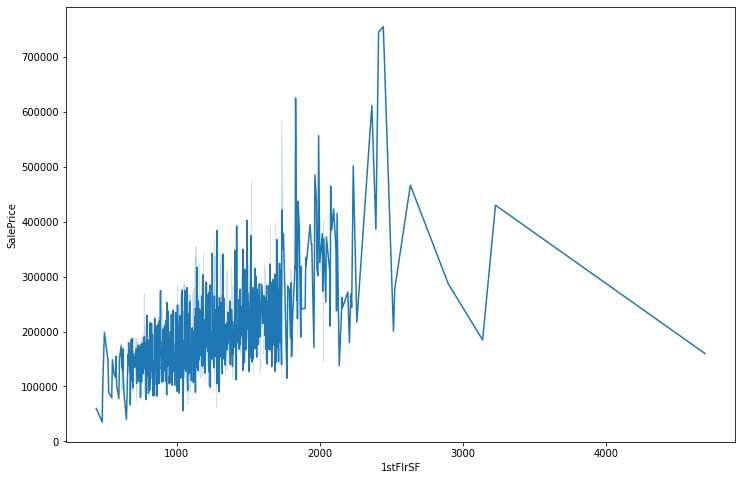

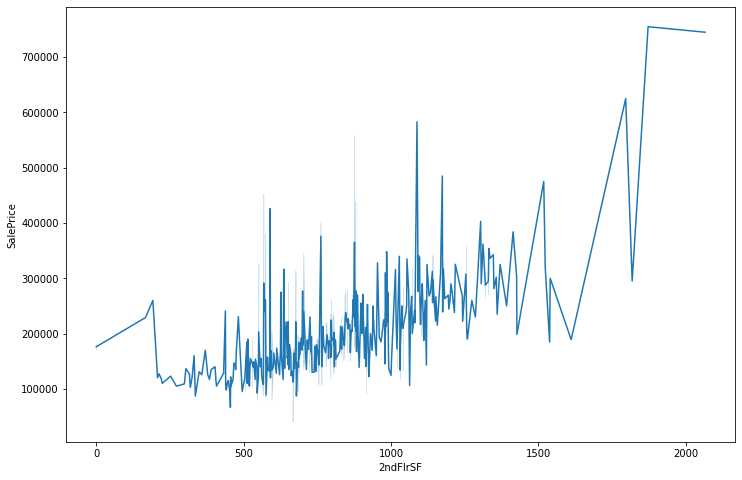

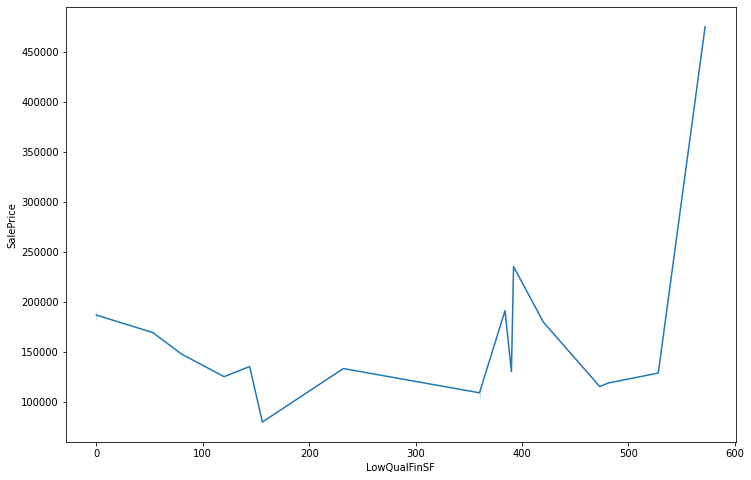

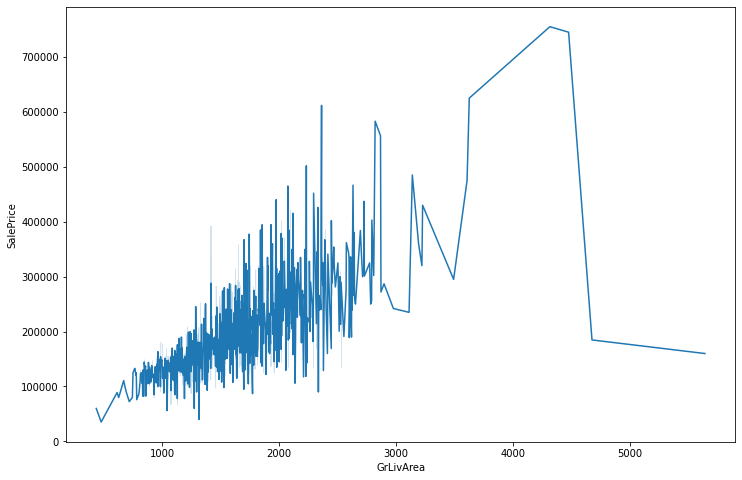

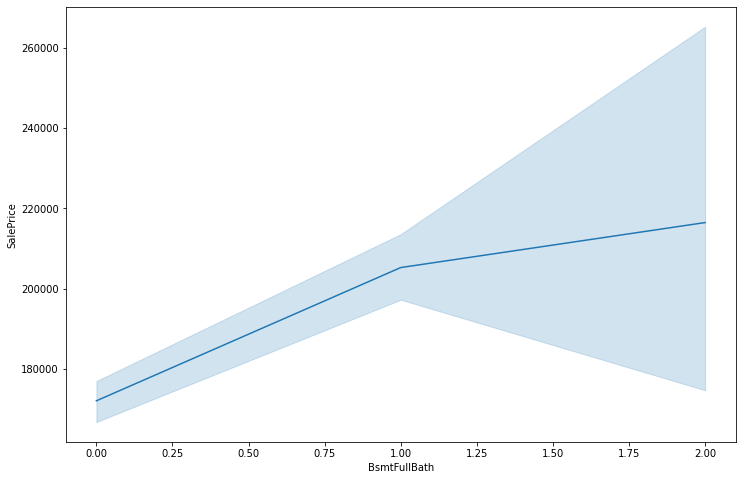

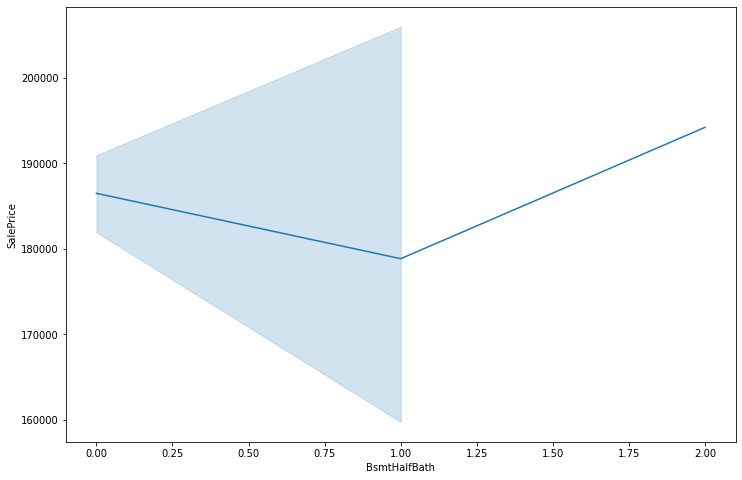

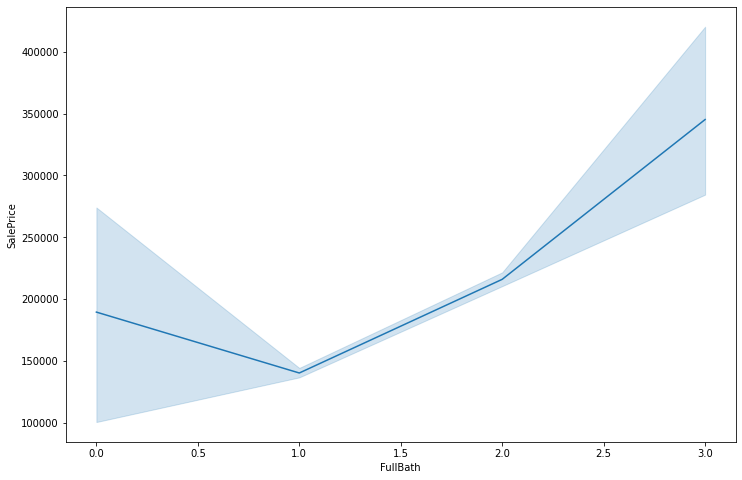

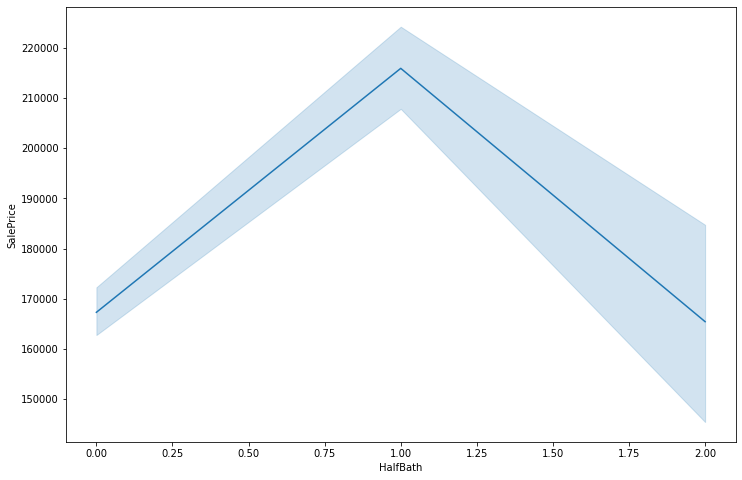

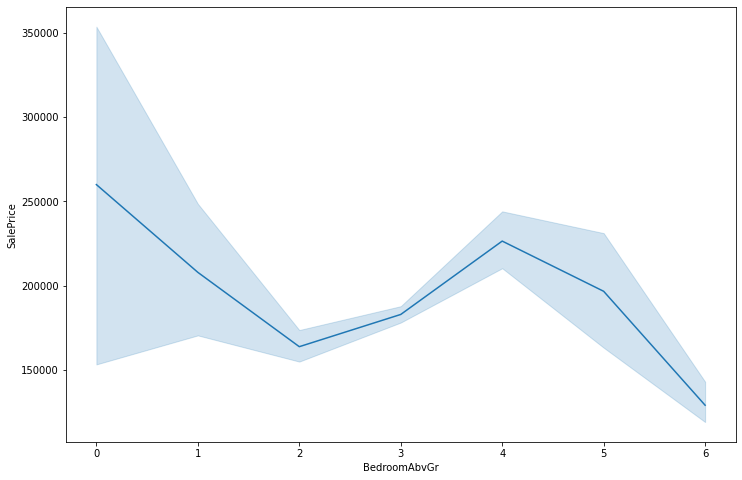

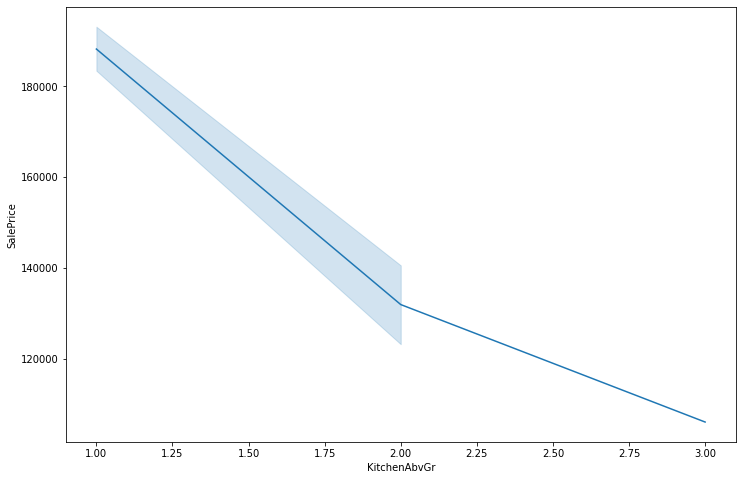

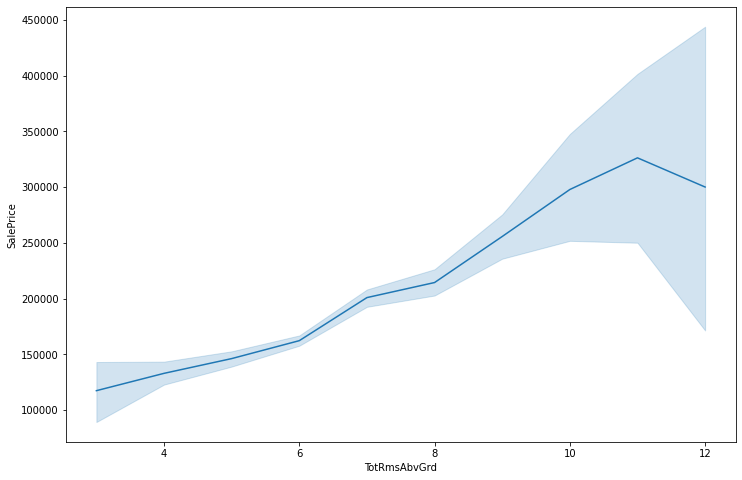

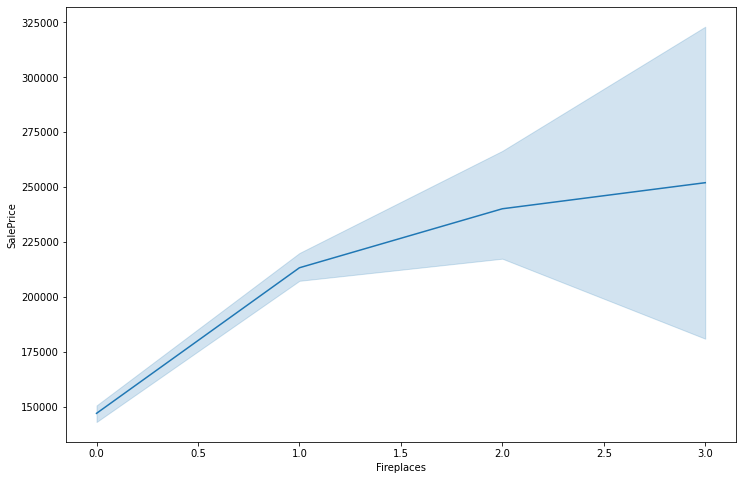

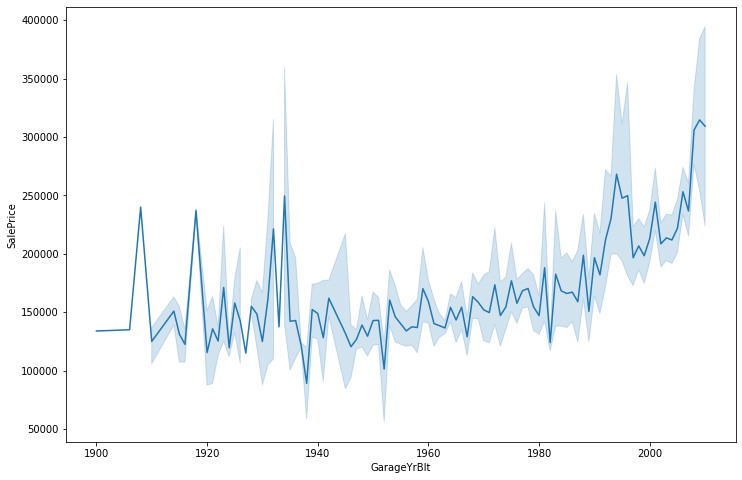

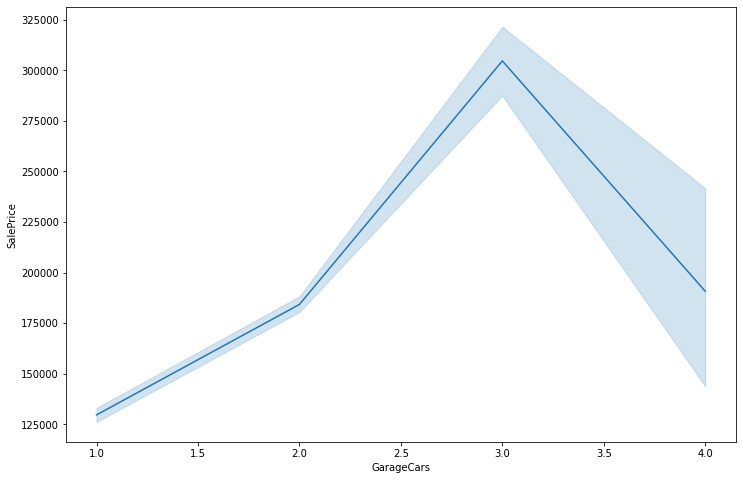

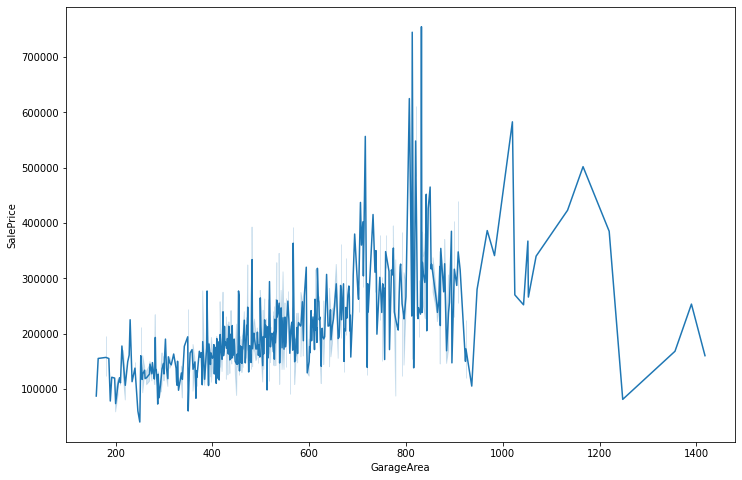

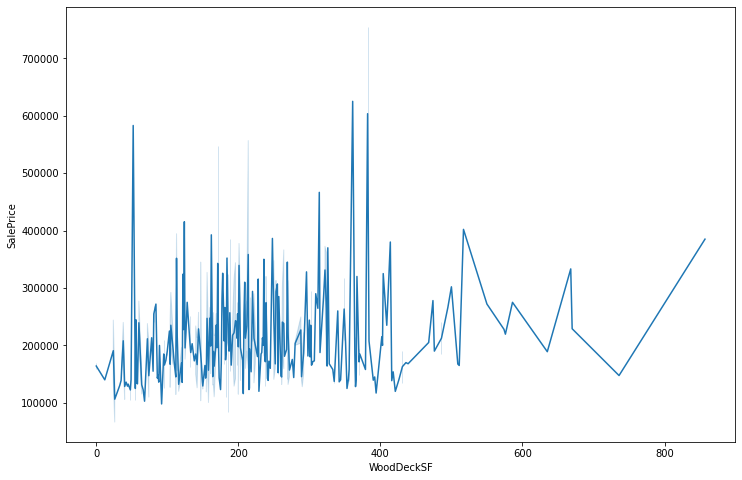

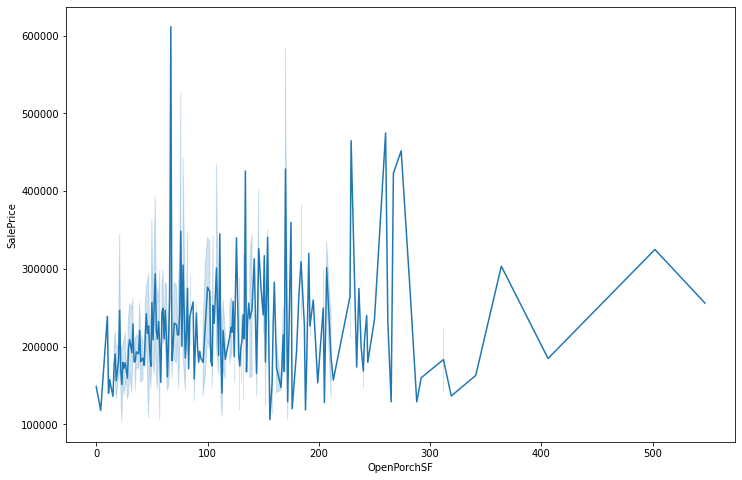

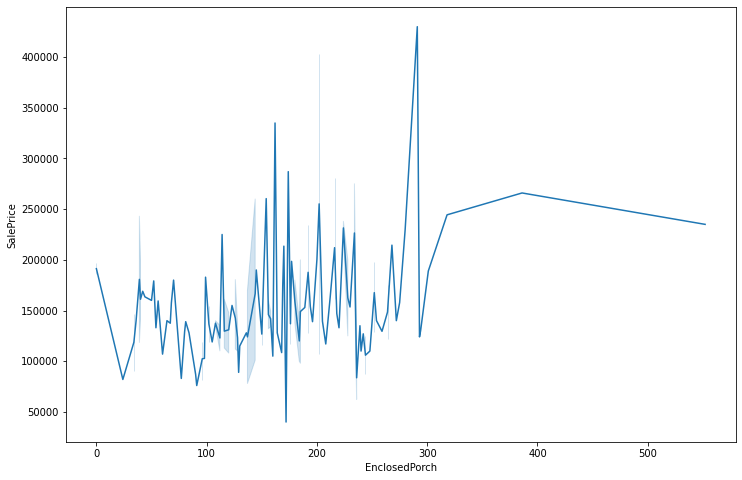

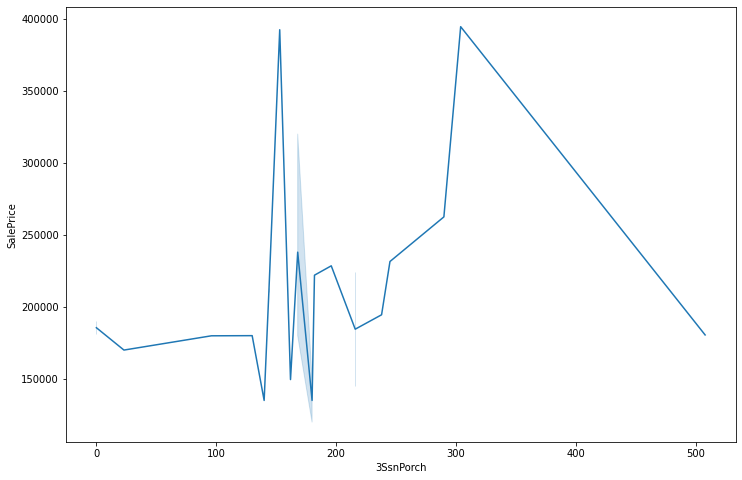

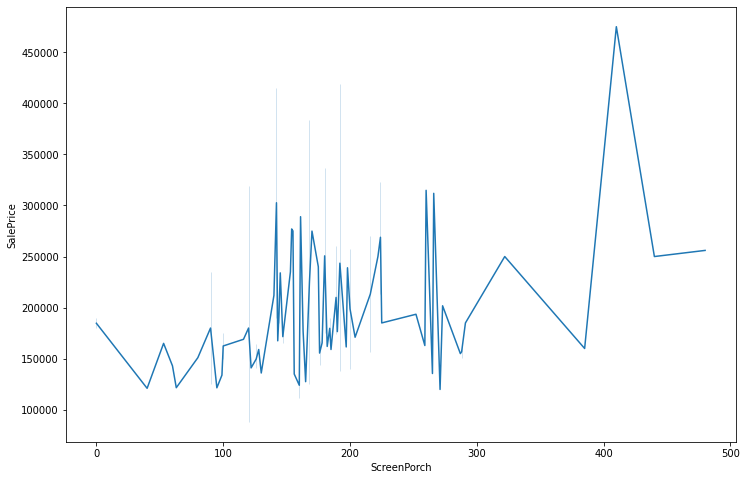

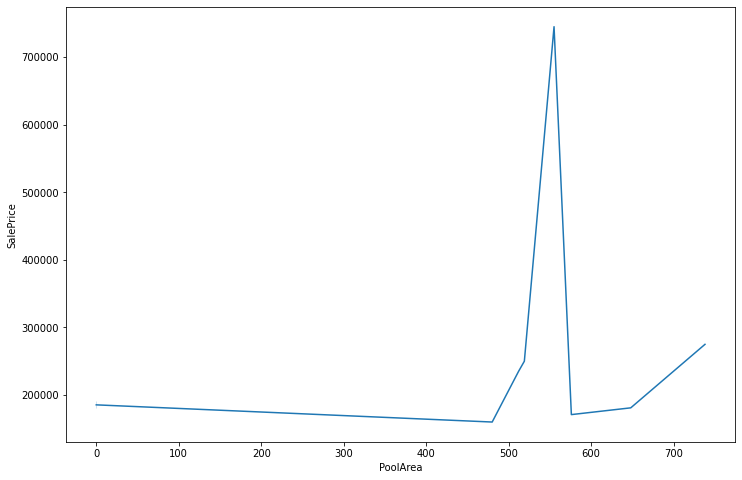

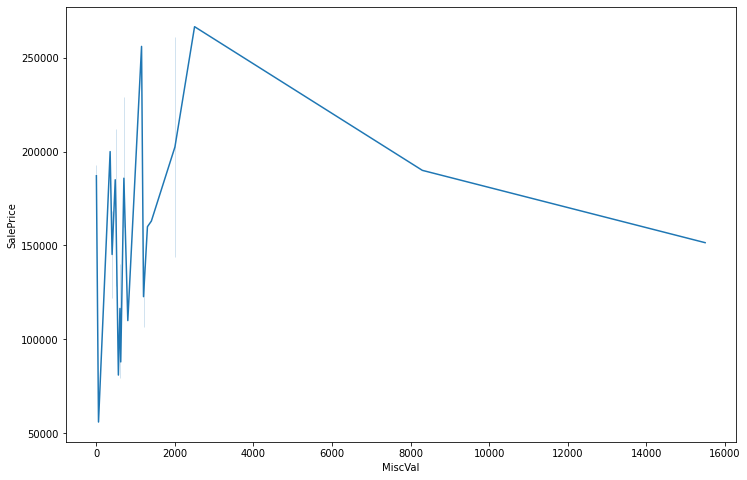

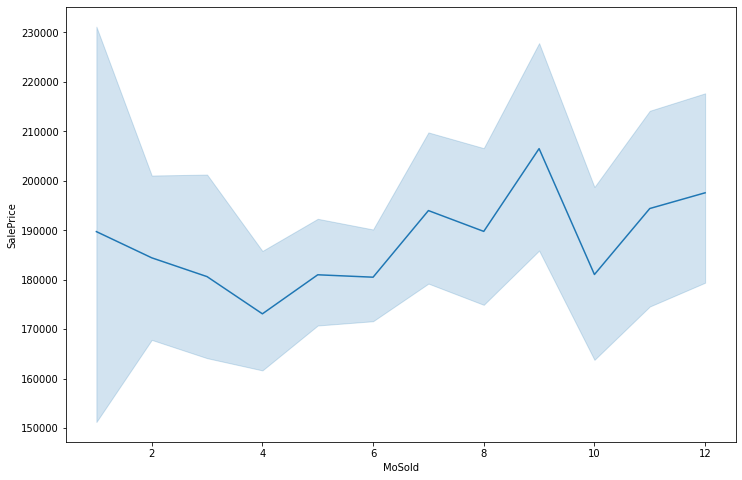

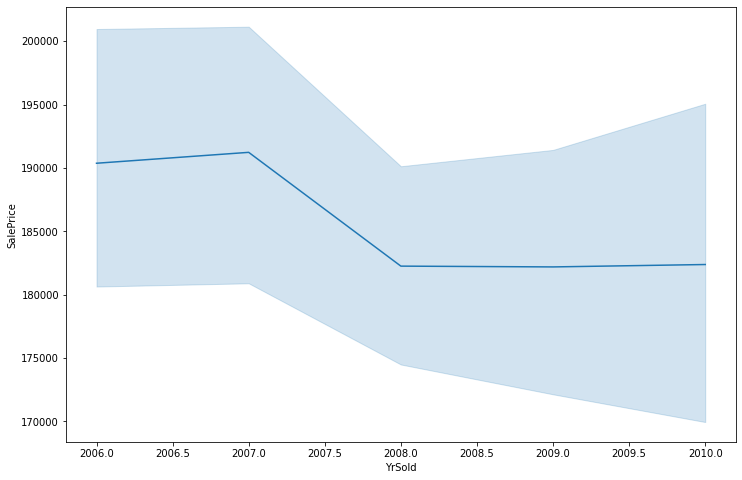

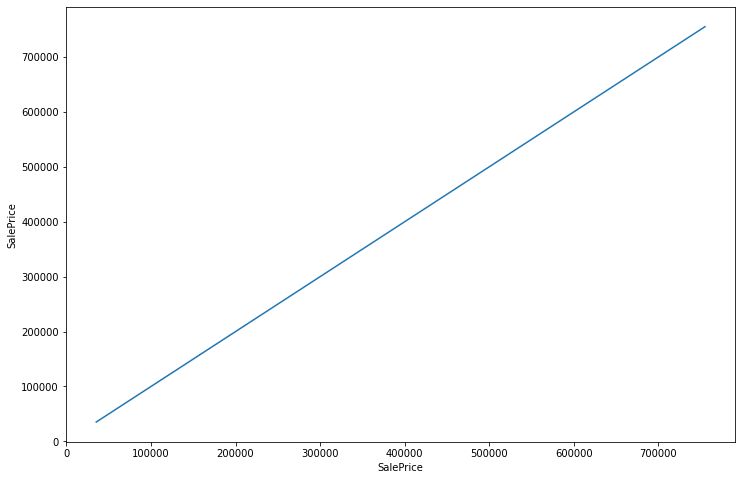

In [142]:
for i in cont_col:
    plt.figure(figsize=(12,8))
    sns.lineplot(y='SalePrice',x=i,data=df)
    plt.show()

Lineplot between output feature & Continuous input feartures

<Figure size 1512x1008 with 0 Axes>

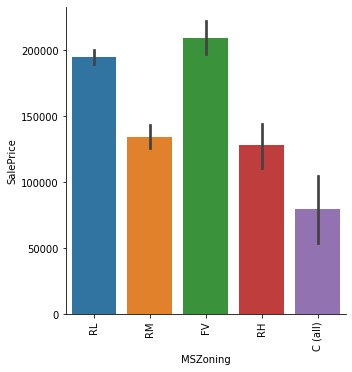

<Figure size 1512x1008 with 0 Axes>

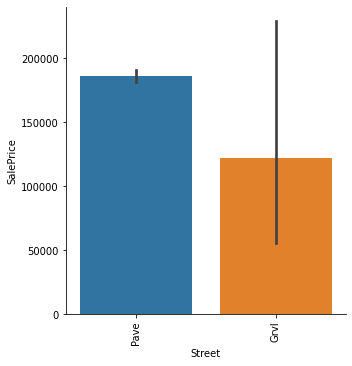

<Figure size 1512x1008 with 0 Axes>

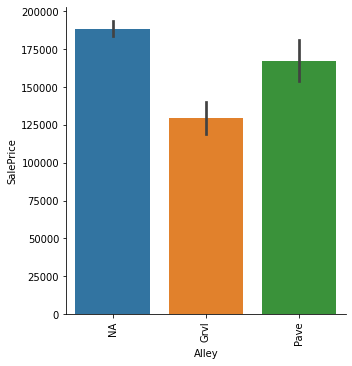

<Figure size 1512x1008 with 0 Axes>

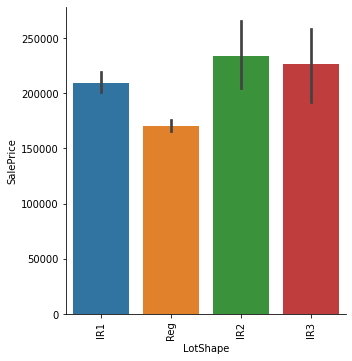

<Figure size 1512x1008 with 0 Axes>

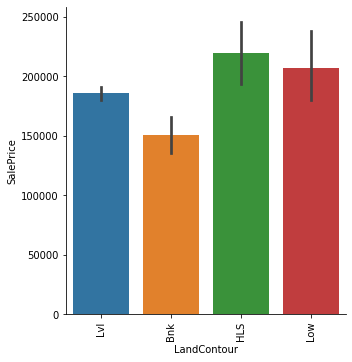

<Figure size 1512x1008 with 0 Axes>

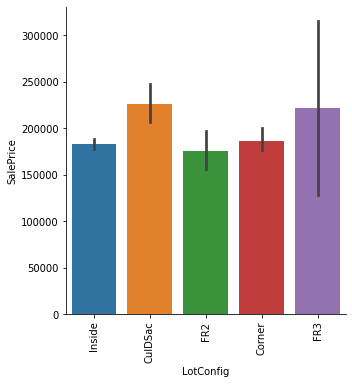

<Figure size 1512x1008 with 0 Axes>

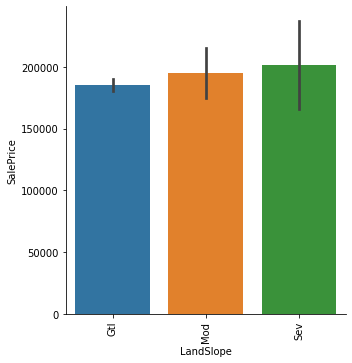

<Figure size 1512x1008 with 0 Axes>

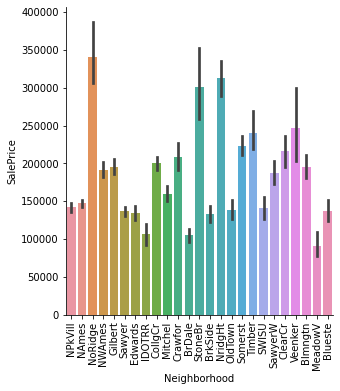

<Figure size 1512x1008 with 0 Axes>

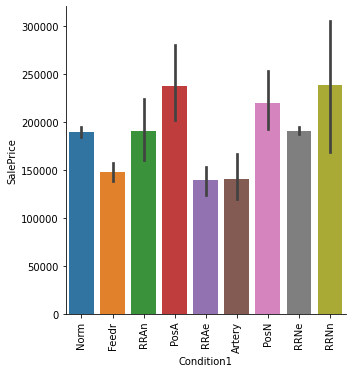

<Figure size 1512x1008 with 0 Axes>

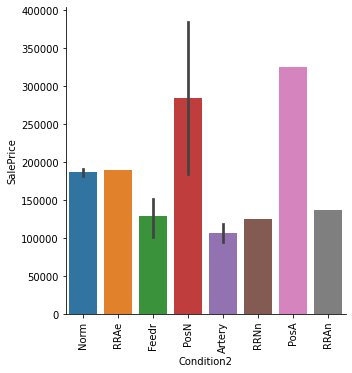

<Figure size 1512x1008 with 0 Axes>

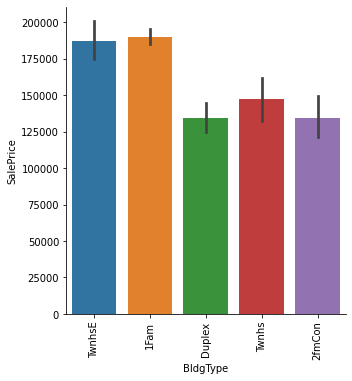

<Figure size 1512x1008 with 0 Axes>

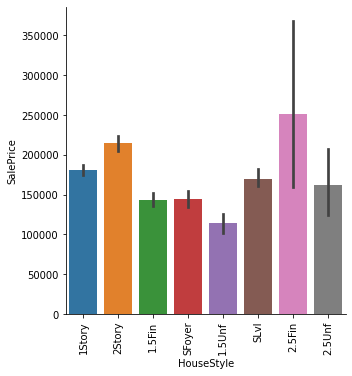

<Figure size 1512x1008 with 0 Axes>

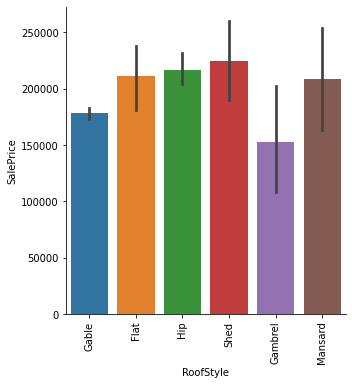

<Figure size 1512x1008 with 0 Axes>

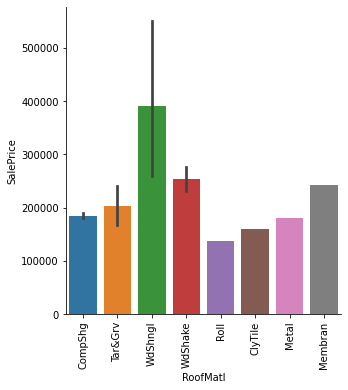

<Figure size 1512x1008 with 0 Axes>

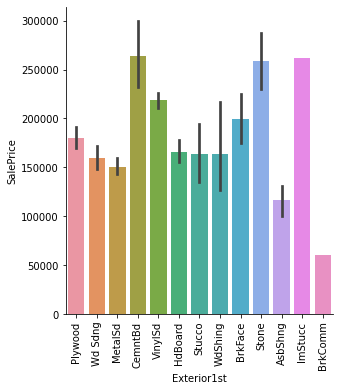

<Figure size 1512x1008 with 0 Axes>

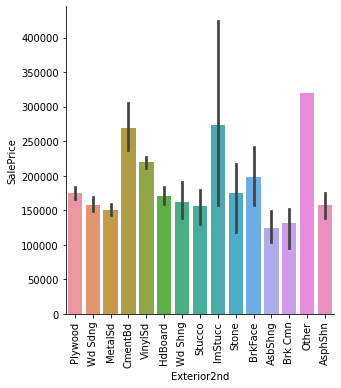

<Figure size 1512x1008 with 0 Axes>

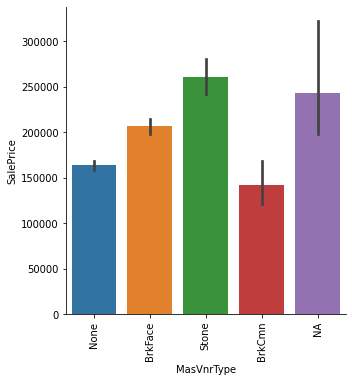

<Figure size 1512x1008 with 0 Axes>

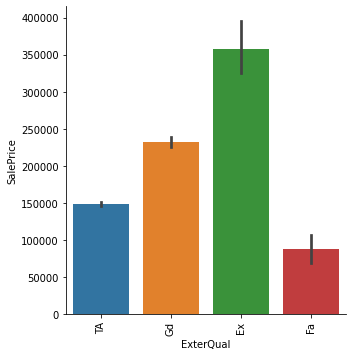

<Figure size 1512x1008 with 0 Axes>

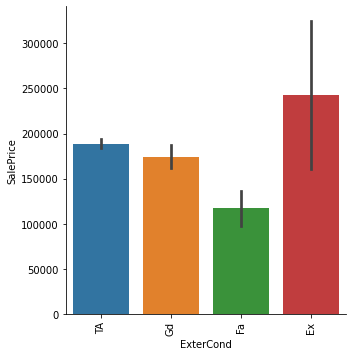

<Figure size 1512x1008 with 0 Axes>

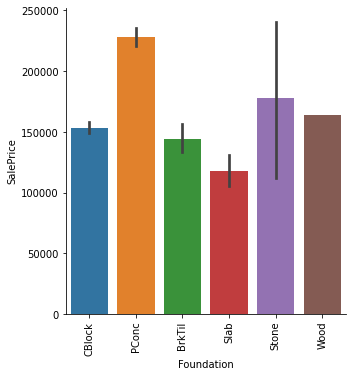

<Figure size 1512x1008 with 0 Axes>

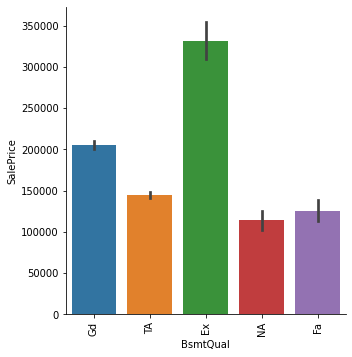

<Figure size 1512x1008 with 0 Axes>

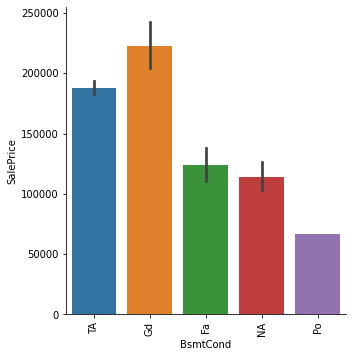

<Figure size 1512x1008 with 0 Axes>

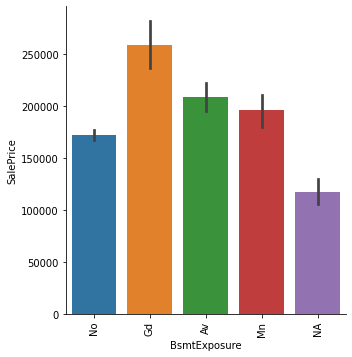

<Figure size 1512x1008 with 0 Axes>

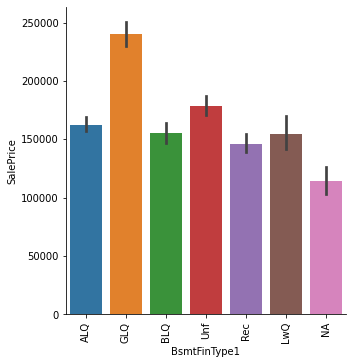

<Figure size 1512x1008 with 0 Axes>

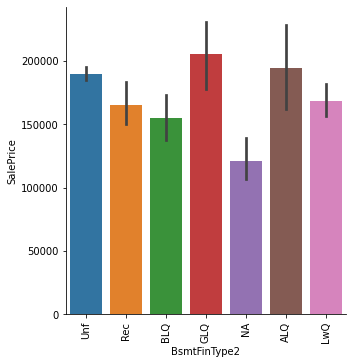

<Figure size 1512x1008 with 0 Axes>

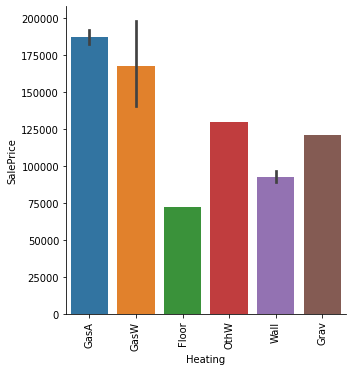

<Figure size 1512x1008 with 0 Axes>

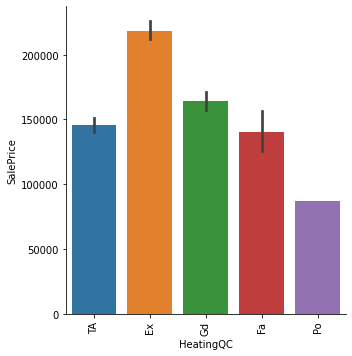

<Figure size 1512x1008 with 0 Axes>

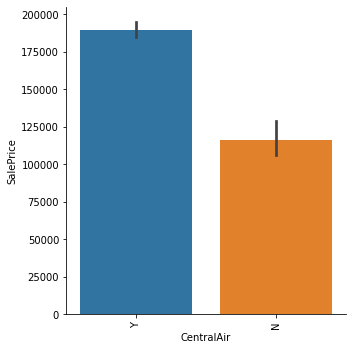

<Figure size 1512x1008 with 0 Axes>

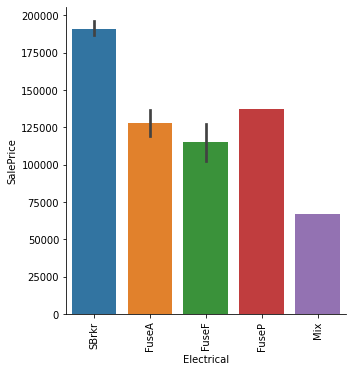

<Figure size 1512x1008 with 0 Axes>

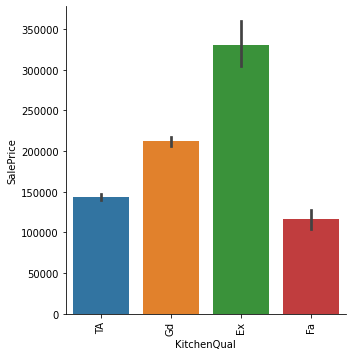

<Figure size 1512x1008 with 0 Axes>

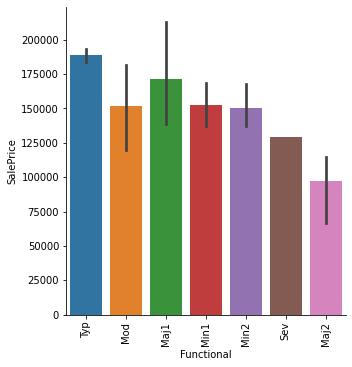

<Figure size 1512x1008 with 0 Axes>

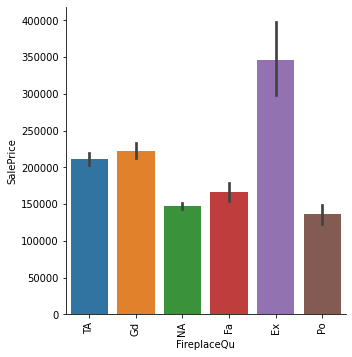

<Figure size 1512x1008 with 0 Axes>

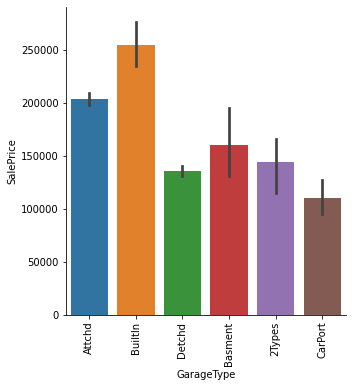

<Figure size 1512x1008 with 0 Axes>

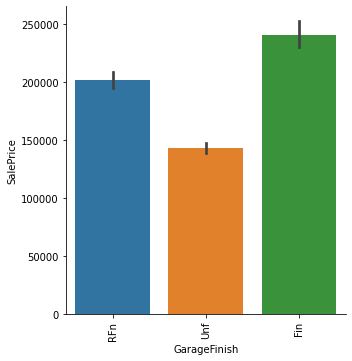

<Figure size 1512x1008 with 0 Axes>

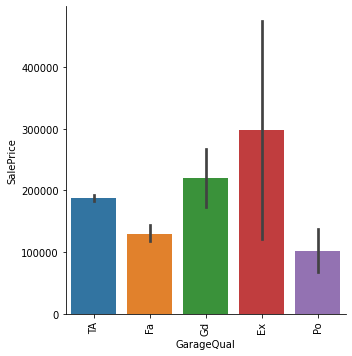

<Figure size 1512x1008 with 0 Axes>

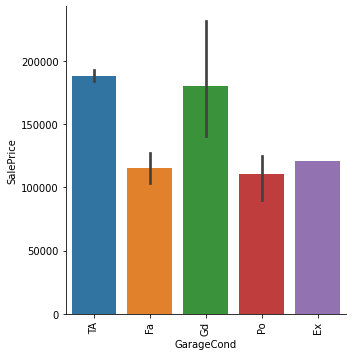

<Figure size 1512x1008 with 0 Axes>

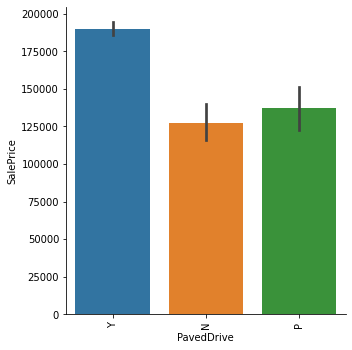

<Figure size 1512x1008 with 0 Axes>

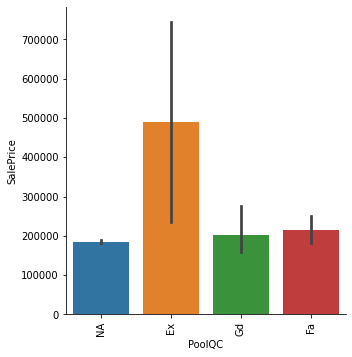

<Figure size 1512x1008 with 0 Axes>

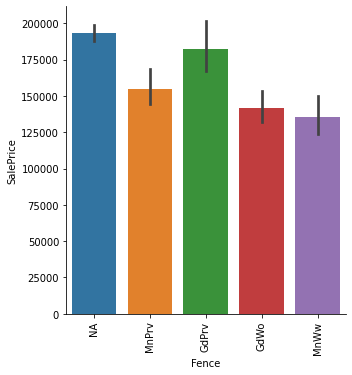

<Figure size 1512x1008 with 0 Axes>

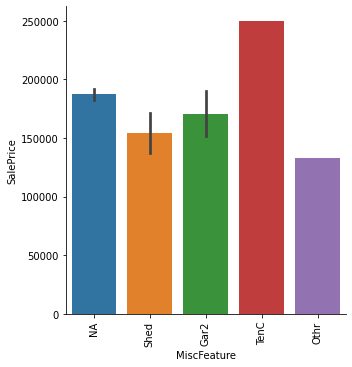

<Figure size 1512x1008 with 0 Axes>

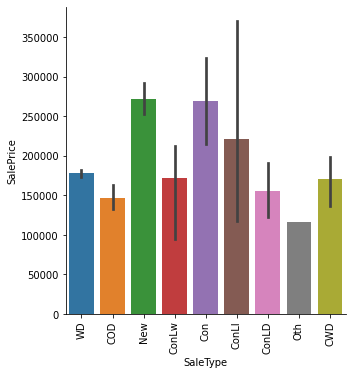

<Figure size 1512x1008 with 0 Axes>

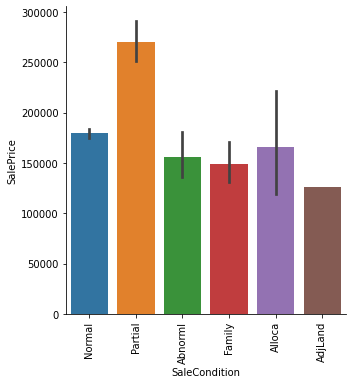

In [143]:
for i in cat_col:
    plt.figure(figsize=(21,14))
    sns.catplot(y='SalePrice',x=i,data=df,kind="bar")
    plt.xticks(rotation=90)
    plt.show()

Catplot between output feature & categorical input feartures

In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i].astype(str))

Encoding categorical data in to numerical format for better processing using label encoder

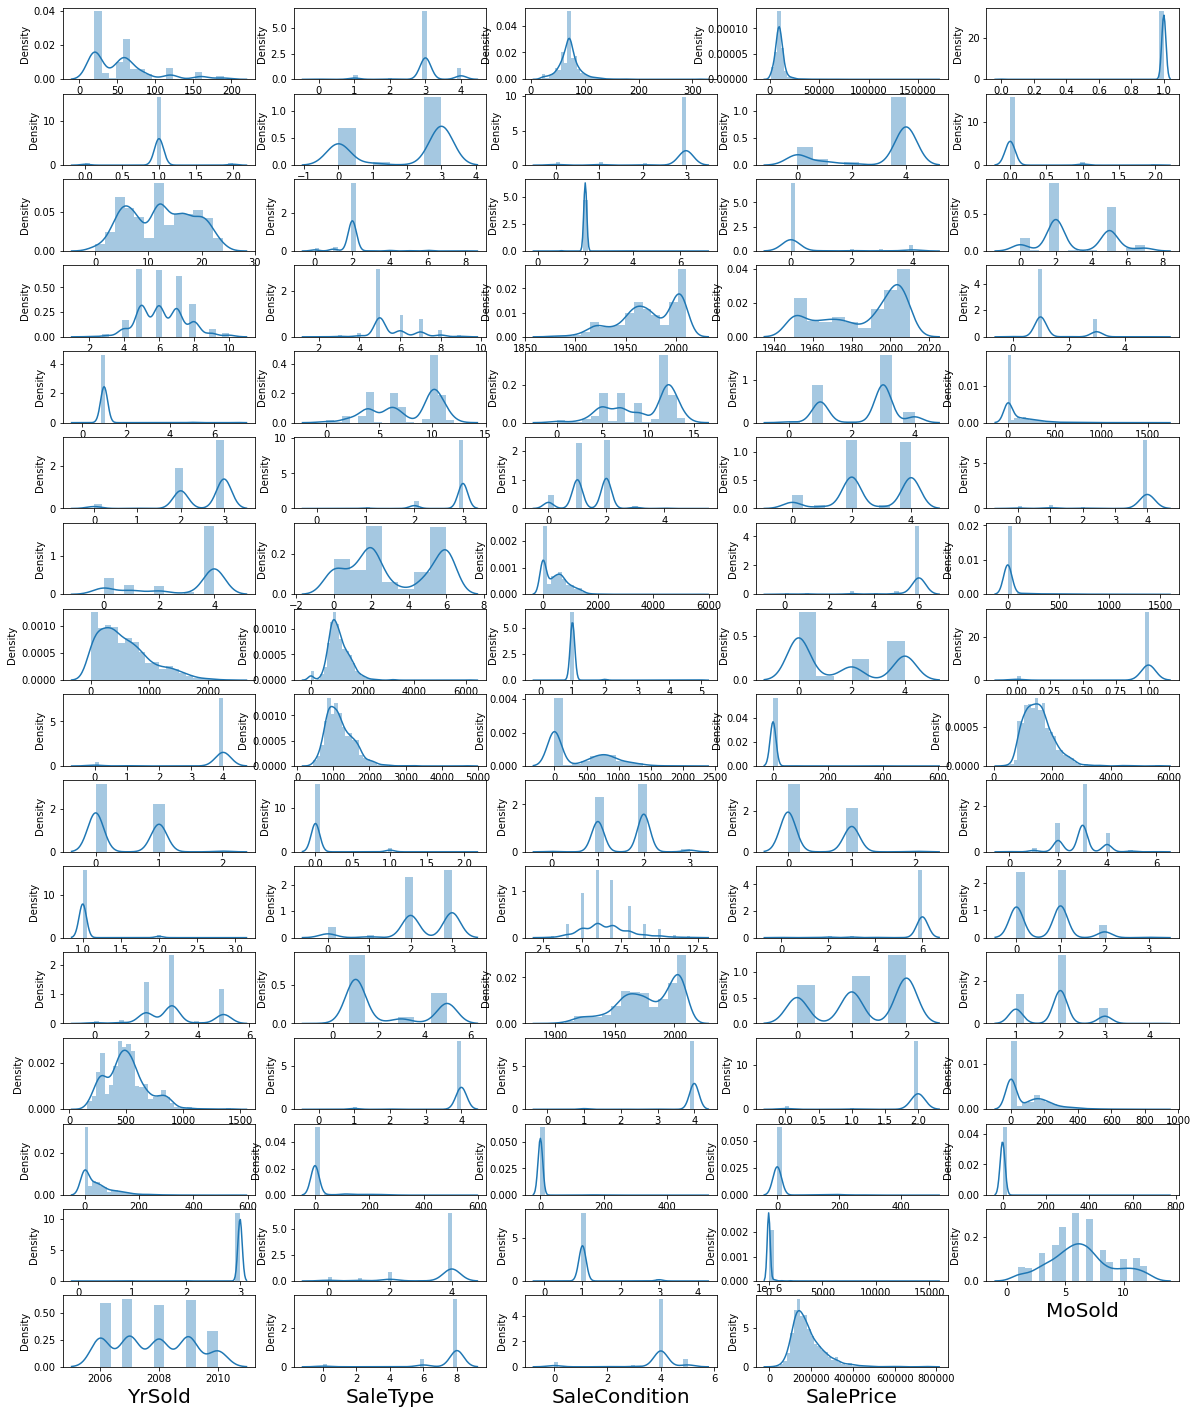

In [145]:
plt.figure(figsize = (20,25))
graph = 1

for column in df:
  if graph<=80:
    ax = plt.subplot(16,5,graph)
    sns.distplot(df[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

There are many features which has skewed data

**TREATING OUTLIERS**

In [146]:
#Treating the outliers (train data)

# findingout the quantile of data 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", data.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-data.shape[0])/df.shape[0])

shape before and after
shape before         : (1104, 79)
shape after          : (78, 79)
Percentage Loss      : 0.9293478260869565


92% of the data is being lost, so can't apply IQR

In [147]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(df))

df1 = df[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df1.shape[0])/df.shape[0])

shape before and after
shape before         : (1104, 79)
shape after          : (432, 79)
Percentage Loss      : 0.6086956521739131


60% of the data is being lost so can't apply z score

In [148]:
#Applying standard scaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(data)

Transformed the data using standard scaler

In [149]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

Features        vif
0      MSSubClass  54.733337
1        MSZoning        NaN
2     LotFrontage   3.731575
3         LotArea   2.659013
4          Street        NaN
..            ...        ...
74         MoSold   2.007328
75         YrSold   2.901597
76       SaleType        NaN
77  SaleCondition        NaN
78      SalePrice  26.140271

[79 rows x 2 columns]

There seems to presence of multicollinearity

In [150]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
df.head()

MSSubClass  MSZoning  LotFrontage  ...  SaleType  SaleCondition  SalePrice
0         120         3     70.98847  ...         8              4     128000
1          20         3     95.00000  ...         8              4     268000
2          60         3     92.00000  ...         8              4     269790
3          20         3    105.00000  ...         0              4     190000
4          20         3     70.98847  ...         8              4     215000

[5 rows x 75 columns]

Removing Unnecessary columns which will not effect on input dataset

In [151]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

Lets divide dataset into input and output

**SKEWNESS**

In [152]:
#Lets chcek the skewness in input dataset
x.skew()

MSSubClass        1.397477
MSZoning         -1.803386
LotFrontage       2.824855
LotArea          10.509336
Street          -19.131048
                   ...    
MiscVal          22.457645
MoSold            0.211830
YrSold            0.116629
SaleType         -3.603373
SaleCondition    -2.847252
Length: 74, dtype: float64

Some of the features are highly skewed

In [153]:
#Let's check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

34


There are 34 features that are positively skewed

In [154]:
#Let's check Number of features having skewness less than -0.55
print(len(x.skew().loc[x.skew()<-0.55]))

22


There are 22 features that are negatively skewed

In [155]:
#Lets treat above skewness using log transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.log1p(x[index])


#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

15


The number of positively skewed data reduced to 15 after applying log transformation

In [156]:
#Lets treat above skewness using log transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.log1p(x[index])


#Let's again check Number of features having skewness less than -0.55
print(len(x.skew().loc[x.skew()<-0.55]))

28


The number of negatively skewed features is 28 after applying log transformation

**DATA PREPROCESSING**

In [158]:
#Lets do the preprocessing to bring features to common scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1.head()

MSSubClass  MSZoning  LotFrontage  ...    YrSold  SaleType  SaleCondition
0    1.453488 -0.013079     0.118764  ... -0.604637  0.333910       0.178727
1   -1.124697 -0.013079     1.069000  ... -0.604637  0.333910       0.178727
2    0.445166 -0.013079     0.964190  ... -0.604637  0.333910       0.178727
3   -1.124697 -0.013079     1.396123  ...  1.655586 -4.516577       0.178727
4   -1.124697 -0.013079     0.118764  ...  0.902178  0.333910       0.178727

[5 rows x 74 columns]

Scaled the data using standard scaler

**PCA**

In [159]:
from sklearn.decomposition import PCA
cov_matrix = PCA(n_components = len(x1.columns))
cov_matrix.fit(x1)

PCA(copy=True, iterated_power='auto', n_components=74, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Applied PCA 

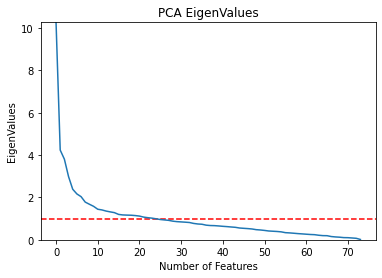

In [160]:
# Let's plot the PCA components
plt.ylabel('EigenValues')
plt.xlabel('Number of Features')
plt.title('PCA EigenValues')
plt.ylim(0,max(cov_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(cov_matrix.explained_variance_)
plt.show()

Visualization of PCA eigenvalues and eigenvalues

In [161]:
#Let's check variance 
variance = cov_matrix.explained_variance_ratio_
var=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)

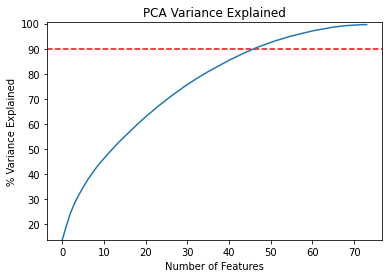

In [162]:
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=90, color='r', linestyle='--')
plt.plot(var)
plt.show()

plot of PCA components with variance

In [163]:
pca=PCA(n_components=45)
xp=pca.fit_transform(x1)
x1=xp

As per pca & variance analysis we need 45 features for higher % of information and less data loss

In [165]:
x1.shape

(1104, 45)

We are left with 1104 rows and 45 columns

**REGRESSION ANALYSIS**

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.20, random_state=30)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df

Modelling Algorithm  r2 score           MSE
0                  LR  0.796679  1.719831e+09
1                  RF  0.792607  1.754272e+09
2                 KNN  0.662880  2.851595e+09
3                  GB  0.816165  1.555002e+09

Trained the data and received r2 score and MSE for all the algorithms

In [173]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.20, random_state=30)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x1, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

Modelling Algorithm  CV SCORE
0                  LR  0.759852
1                  RF  0.785777
2                 KNN  0.693756
3                  GB  0.812586

Calculated cross validation score for each of the algorithm

In [174]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

Modelling Algorithm  r2 score  CV SCORE  Difference
0                  LR  0.796679  0.759852    0.036827
1                  RF  0.792607  0.785777    0.006831
2                 KNN  0.662880  0.693756   -0.030876
3                  GB  0.816165  0.812586    0.003580

The difference is minimum for the gradient boosting regressor

In [178]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'subsample' : [1.0,1.5],
    'learning_rate' : [0.1,0.2,0.15,0.25],
    'n_estimators'  : [100,200,120,150],
    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']
    }

Applied hyperparameter tuning

In [179]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_param)

Applied grid search CV

In [180]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

Trained the model

In [181]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'n_estimators': 100, 'subsample': 1.0}


Got the best parameters

In [183]:
#FINAL MODEL FOR Next_Tmin
#Substituting the best parameters:

gb =  GradientBoostingRegressor(criterion = 'friedman_mse', learning_rate = 0.2, n_estimators = 100, subsample = 1.0)

gb.fit(X_train, y_train)
pred = gb.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.8133447372187398

The r2 score is 81.33%

In [184]:
#SAVING THE MODEL:

import joblib
joblib.dump(gb, 'Housing_final_model.pkl')


['Housing_final_model.pkl']

Saved the model

**PREDICTION FOT THE TEST DATA**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing_data_test.xlsx to housing_data_test.xlsx


Uploaded the testing data

In [4]:
data = pd.read_excel('housing_data_test.xlsx')
data.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0   337          20       RL  ...    2007        WD        Normal
1  1018         120       RL  ...    2009       COD       Abnorml
2   929          20       RL  ...    2009        WD        Normal
3  1148          70       RL  ...    2009        WD        Normal
4  1227          60       RL  ...    2008        WD        Normal

[5 rows x 80 columns]

Reading the data

In [8]:
print("Shape of our Test dataset is",data.shape)

Shape of our Test dataset is (292, 80)


The testing data has 292 rows and 90 columns

In [9]:
data.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

There are null values in the testing data

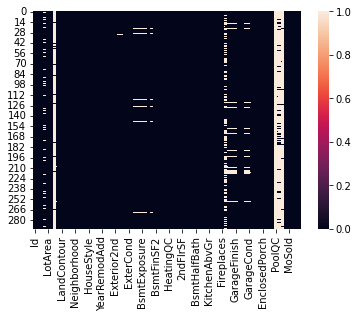

In [10]:
sns.heatmap(data.isnull())

Visualization of the null values in testing data

In [12]:
data.drop('Utilities',axis=1,inplace=True)

Removing Column "Utilities" as we have only one unique value.

In [14]:
data.drop('Id',axis=1,inplace=True)

Removing Column "Id" as it will not affect our core dataset

In [15]:
data.drop('PoolQC',axis=1,inplace=True)

Removing Column "PoolQC" as it will not affect our core dataset

In [16]:
#Data Cleaning: 
data["Alley"].fillna("NA",inplace=True)
data["Fence"].fillna("NA",inplace=True)
data["MiscFeature"].fillna("NA",inplace=True)
data["FireplaceQu"].fillna("NA",inplace=True)
data["GarageType"].fillna("NA",inplace=True)
data["GarageYrBlt"].fillna("NA", inplace=True)
data["GarageFinish"].fillna("NA",inplace=True)
data["GarageQual"].fillna("NA",inplace=True)
data["GarageCond"].fillna("NA",inplace=True)
data["BsmtQual"].fillna("NA",inplace=True)
data["BsmtCond"].fillna("NA",inplace=True)
data["BsmtExposure"].fillna("NA",inplace=True)
data["BsmtFinType1"].fillna("NA",inplace=True)
data["BsmtFinType2"].fillna("NA",inplace=True)
data["MasVnrType"].fillna("NA",inplace=True)

Handling Null values of Categorical type features


In [23]:
data["GarageYrBlt"].fillna("NA", inplace=True)

Handling Null values of Categorical type features


In [18]:
#Data Cleaning: 

data["MasVnrArea"].fillna(data["MasVnrArea"].mean(),inplace=True)
data["LotFrontage"].fillna(data["LotFrontage"].mean(),inplace=True)

Handling Null values of Continous type features

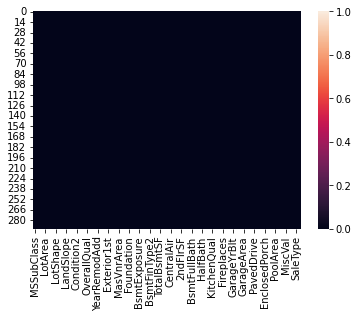

In [24]:
#To check missing values using Seaborn Heatmap after data cleaning
sns.heatmap(data.isnull())

There is no null value in the testing data

In [30]:
#making different lists for categorical & continuous variables
category_data=[x for x in data.columns if data[x].dtype==object]
cont_data=[x for x in data.columns if x not in category_data]
list(category_data)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

List of categorical features in the testing data

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in category_data:
    data[i]=le.fit_transform(data[i].astype(str))

Encoding categorical data in to numerical format for better processing using label encoder

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_ts=ss.fit_transform(data)
df_ts=pd.DataFrame(df_ts,columns=data.columns)
df_ts.head()

MSSubClass  MSZoning  LotFrontage  ...    YrSold  SaleType  SaleCondition
0   -0.856054 -0.287006     0.981605  ... -0.650908   0.23029       0.148654
1    1.431981 -0.287006     0.000000  ...  0.863555  -6.49418      -3.323909
2   -0.856054 -0.287006     0.000000  ...  0.863555   0.23029       0.148654
3    0.287963 -0.287006     0.429998  ...  0.863555   0.23029       0.148654
4    0.059160 -0.287006     0.981605  ...  0.106324   0.23029       0.148654

[5 rows x 77 columns]

Lets do the preprocessing to bring features to common scale

In [34]:
from sklearn.decomposition import PCA
cov_matrix = PCA(n_components = len(df_ts.columns))
cov_matrix.fit(df_ts)

PCA(copy=True, iterated_power='auto', n_components=77, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA for test dataset

In [35]:
pca=PCA(n_components=45)
tp=pca.fit_transform(df_ts)
df_ts=tp

As per pca & variance analysis we need 45 features for higher % of information and less data loss

In [36]:
pd.DataFrame(data=df_ts)

0         1         2   ...        42        43        44
0    6.151675  2.065495  1.101008  ... -0.137747  0.067272  0.747073
1    1.167950  3.488113 -1.863307  ...  0.439276  0.007897 -0.687642
2    3.919224 -0.563845  0.267162  ... -0.431303 -0.339330  1.188183
3   -1.842181 -1.220353  1.367065  ... -1.192912 -1.092877  1.616745
4    3.481038 -3.126769  0.314183  ... -0.421938  0.460082 -0.454125
..        ...       ...       ...  ...       ...       ...       ...
287  3.584672 -0.259248  0.099823  ... -0.085486  0.301139 -0.359778
288 -0.813618  0.997952 -1.671957  ... -0.185014  0.023873  0.735034
289 -0.731448  2.189162 -1.006692  ... -0.626269  1.121611 -0.611434
290 -2.189383 -0.264864  1.530107  ... -0.490738  0.652585 -0.117578
291 -3.861642 -1.487495 -3.330470  ...  0.550779 -1.583570 -0.450160

[292 rows x 45 columns]

checking test data after PCA